<a href="https://colab.research.google.com/github/DeeeTeeee/machinelearning/blob/master/Credit_Card_PredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import pandas as pd
import numpy as np
import plotly
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import plotly.subplots as subplots
import warnings
warnings.filterwarnings("ignore")

In [71]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
# Load the dataset and display some values
train_df = pd.read_csv('/content/drive/MyDrive/emma/archive/train_20D8GL3.csv')
test_df = pd.read_csv('/content/drive/MyDrive/emma/archive/test_O6kKpvt.csv')
submission_df = pd.read_csv('/content/drive/MyDrive/emma/archive/sample_submission_gm6gE0l.csv')


In [73]:
# Set the max_colwidth option to a higher value
pd.set_option('display.max_colwidth', None)

In [74]:
original_train_df=train_df.copy()
original_test_df=test_df.copy()

In [75]:
# A way to eliminate rows containing NaN values
train_df = train_df[~train_df.isna().any(axis=1)]
test_df = test_df[~test_df.isna().any(axis=1)]
df_submission = submission_df[~submission_df.isna().any(axis=1)]

#                        Understanding the Data


We will look at the structure of the train and test datasets.

Firstly, we will check the features present in our data and then we will look at their data types.

In [76]:
train_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [77]:
test_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

We have 24 independent variables and 1 target variable, i.e. 'default_payment_next_month' in the train dataset.

We will predict the Payment Default next month using the model built using the train data.

In [78]:
train_df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default_payment_next_month    int64
dtype: object

In [79]:
test_df.dtypes

ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
dtype: object

In [80]:
train_df.shape, test_df.shape

((21000, 25), (9000, 24))

In [81]:
# Set the max_colwidth option to a higher value
pd.set_option('display.max_columns', None)

In [82]:
train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [83]:
test_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,10178,60000,2,2,1,30,0,0,0,0,0,0,36082,37127,38117,38874,38667,39544,1628,1618,1375,1403,1520,1205
1,5304,200000,2,1,2,29,0,0,0,0,2,0,61099,64160,76593,93988,50292,10510,4160,14593,20150,0,5739,12050
2,5187,230000,1,1,2,39,0,0,0,0,-2,-2,38395,39943,20650,0,0,0,2500,2000,0,0,0,0
3,14495,150000,1,1,2,40,0,0,0,0,0,0,152175,148872,145978,139791,142745,146872,5800,5245,5200,5200,6500,7200
4,20444,140000,1,2,2,27,0,0,0,0,0,0,80210,67746,76230,77954,78953,81848,10000,10000,3393,3260,5000,3000


##       Proposed Enhancements to the data provided

From the meta-data provided, and looking at the first few rows of the training dataset (and hence the test dataset), I find the following serious anamolies in the dataset :

1. The PAY_0 column-name should actually be PAY_1. We shall rename it.

2. The columns PAY_1 to PAY_6 are said to be capturing the "Payment delay in months". For example, PAY_6 represents "the repayment status in April, 2005", and value of 7 in that column would mean "payment delay for seven months", whereas a value of -1 in that column would mean "paid duly". I find that many of the values in PAY_1 to PAY_6 are zeros and -2. and the meta data has not specified any meanings to 0 and -2 in these columns.

Now when it comes to credit card payments, the following types of payments are generally captured by such organizations :

1.  **"No Payment"**  indicating that the customer refused to make any payment against the bill.

2.  **"Minimum Payment"**  representing about 5-10% against the total billed amount which the customer has to pay within the credit period applicable to the customer to keep the card current and active.

3. **"Full Payment"**  representing full payment against the total billed amount which the customer has to pay within the credit period applicable.

4. **"Part Payment"**  representing any fraction of the payment against the total billed amount which the customer may decide to pay.

5. Such **"Part Payment"**  can be less than the **"Minimum Payment"**, equal to the minimum payment or more than the minimum payment but less than the total amount.

6. All such **"Pending Payments"** are then carried forward to the next bill, with additional applicable finance and interest charges on such pending amount.

7. Customer can keep paying **"Part Payments"** over many months and keep accumulating his **"Total Pending Amount"** till his/her **"Credit Balance Limit"** is reached, in the process incurring additional monthly finance and interest charges.

Based on the common understanding of the credit card billing cycle, we shall utilize the data available in the BILL_AMT1 to BILL_AMT6 columns, PAY_AMT1 to PAY_AMT6 columns, and LIMIT_BAL column to create the following additional variables to enrich our predictive model  :

Even though it is not explicitly mentioned anywhere, we are assuming that all the bills have a 1-month credit period in which customers need to make payments.

1.  **MIN_AMT_1 to MIN_AMT_6 :**

These values shall represent the "Minimum Billing" amount that needs to be paid within the next 1-month credit period for the card to be kept active. We are taking 10% as the Minimum amount that needs to be paid to keep the card live. This means that MIN_AMT_1 shall represent the minimum amount (10%) of the total pending amount till August-2005 to be paid in September-2005.

2.  **PENDING_AMT_1 to PENDING_AMT_6 :**

These integer variables shall represent the "Total Pending Amount" for the previous 6 bills. This is because we have the data only for the 6 months. Hence PENDING_AMT_1 shall represent total pending amount in September-2005 - which is the accumulated unpaid amounts for the last 6 months (ie. since April-2005), but PENDING_AMT_2 shall represent total pending amount in August-2005 since April-2005 and so on.

3.  **DELINQ_1 to DELINQ_6 :**

These indicators shall represent how many times the customer has been classified into "Delinquent" state. As per the credit card business, customers move to the delinquency state when they fail to pay the Minimum Billing Amount necessary to keep the card alive. Assuming 1-month credit period for making the payment, this would mean that if the customer does not pay more than the MIN_AMT bill of August-2005 by September-2005, the customer would be classified as "Delinquent".

Please note that any amount paid which is less than the required MIN_AMT is considered as no payment, and customer is moved to "Delinquent" state.

Hence, DELINQ_1 would represent how many times customer has been in delinquent state since April-2005.

4. **NO_PMNT_1 to NO_PMNT_6 :**

These indicators shall capture how many times the customer made "No Payments". This would mean that if the customer does not pay any amount (0 value) against the bill of August-2005 by September-2005, the customer payment status would be moved to "No Payment" state.

Hence, NO_PMNT1 would represent how many times customer made "No Payments" since April-2005.

5. **AVG_6MTH_BAL :**

This value shall represent mean (average) value of PENDING_AMT_1 over a 6 month period.

6. **CREDIT_UTILIZATION_RATIO :**

Average 6 month balance (AVG_6MTH_BAL) divided by the individual’s credit limit (LIMIT_BAL). As per the credit card industry, anything <= .3 is considered good, whereas anything closer to 1 is considered very risky.

From the data given, I am to predict customers who are likely to default in their payments next month.

Considering that the last bill data in the dataset is for September-2005, we have been asked to predict customers who shall default in Oct-2005.


## Create additional variables for the enhancement of the data


First of all, we shall proceed to create the additional variables from the existing data as described in detail above.

In [84]:
train_df.rename(columns = {'PAY_0':'PAY_1'}, inplace = True)
test_df.rename(columns = {'PAY_0':'PAY_1'}, inplace = True)

We now proceed to create the additional variables that were explained earlier.

Let us start with creating MIN_AMT6 variable which shall represent the minimum amount of the April-2005 bill to be paid by May-2005.



In [85]:
train_df['MIN_AMT6']=train_df['BILL_AMT6']*0.1
test_df['MIN_AMT6']=test_df['BILL_AMT6']*0.1


Let us create PENDING_AMT6 variable which shall represent (April-2005 Bill Amount - April-2005 Payment Amount).



In [86]:
train_df['PENDING_AMT6']=train_df['BILL_AMT6'] - train_df['PAY_AMT6']
test_df['PENDING_AMT6']=test_df['BILL_AMT6'] - test_df['PAY_AMT6']

Let us create MIN_AMT5 variable which shall represent the minimum of the pending amount till May-2005 to be paid by June-2005.



In [87]:
train_df['MIN_AMT5']=train_df['PENDING_AMT6']*0.1
test_df['MIN_AMT5']=test_df['PENDING_AMT6']*0.1

Let us create DELINQ_5 variable which shall represent whether the customer has become 'Delinquent' because customer has failed to pay more than the Minimum amount.



In [88]:
train_df['DELINQ_5'] = np.where((train_df['PAY_AMT5']>0) & (train_df['PAY_AMT5']<train_df['MIN_AMT6']),1,0)
test_df['DELINQ_5'] = np.where((test_df['PAY_AMT5']>0) & (test_df['PAY_AMT5']<test_df['MIN_AMT6']),1,0)

Let us create NO_PMNT5 variable which shall represent whether the customer did not make any payment in May-2005.



In [89]:
train_df['NO_PMNT5']=np.where(train_df['PAY_AMT5'] == 0,1,0)
test_df['NO_PMNT5']=np.where(test_df['PAY_AMT5'] == 0,1,0)

Let us create PENDING_AMT5 variable.



In [90]:
train_df['PENDING_AMT5'] = (train_df['BILL_AMT5']+train_df['BILL_AMT6']) - (train_df['PAY_AMT5']+train_df['PAY_AMT6'])
test_df['PENDING_AMT5'] = (test_df['BILL_AMT5']+test_df['BILL_AMT6']) - (test_df['PAY_AMT5']+test_df['PAY_AMT6'])

Let us create all other derived variables in a similar manner.


In [91]:
train_df['MIN_AMT4']=train_df['PENDING_AMT5']*0.1
test_df['MIN_AMT4']=test_df['PENDING_AMT5']*0.1

In [92]:
train_df['DELINQ_4'] = np.where((train_df['PAY_AMT4']>0) & (train_df['PAY_AMT4']<train_df['MIN_AMT5']),1,0) + train_df['DELINQ_5']
test_df['DELINQ_4'] = np.where((test_df['PAY_AMT4']>0) & (test_df['PAY_AMT4']<test_df['MIN_AMT5']),1,0) + test_df['DELINQ_5']

In [93]:
train_df['NO_PMNT4']=np.where(train_df['PAY_AMT4'] == 0,1,0) + train_df['NO_PMNT5']
test_df['NO_PMNT4']=np.where(test_df['PAY_AMT4'] == 0,1,0) + test_df['NO_PMNT5']

In [94]:
train_df['PENDING_AMT4'] = (train_df['BILL_AMT4']+train_df['BILL_AMT5']+train_df['BILL_AMT6']) - (train_df['PAY_AMT4']+train_df['PAY_AMT5']+train_df['PAY_AMT6'])
test_df['PENDING_AMT4'] = (test_df['BILL_AMT4']+test_df['BILL_AMT5']+test_df['BILL_AMT6']) - (test_df['PAY_AMT4']+test_df['PAY_AMT5']+test_df['PAY_AMT6'])

In [95]:
train_df['MIN_AMT3']=train_df['PENDING_AMT4']*0.1
test_df['MIN_AMT3']=test_df['PENDING_AMT4']*0.1

In [96]:
train_df['DELINQ_3'] = np.where((train_df['PAY_AMT3']>0) & (train_df['PAY_AMT3']<train_df['MIN_AMT4']),1,0) + train_df['DELINQ_4']
test_df['DELINQ_3'] = np.where((test_df['PAY_AMT3']>0) & (test_df['PAY_AMT3']<test_df['MIN_AMT4']),1,0) + test_df['DELINQ_4']

In [97]:
train_df['NO_PMNT3']=np.where(train_df['PAY_AMT3'] == 0,1,0) + train_df['NO_PMNT4']
test_df['NO_PMNT3']=np.where(test_df['PAY_AMT3'] == 0,1,0) + test_df['NO_PMNT4']

In [98]:
train_df['PENDING_AMT3'] = (train_df['BILL_AMT3']+train_df['BILL_AMT4']+train_df['BILL_AMT5']+train_df['BILL_AMT6']) - (train_df['PAY_AMT3']+train_df['PAY_AMT4']+train_df['PAY_AMT5']+train_df['PAY_AMT6'])
test_df['PENDING_AMT3'] = (test_df['BILL_AMT3']+test_df['BILL_AMT4']+test_df['BILL_AMT5']+test_df['BILL_AMT6']) - (test_df['PAY_AMT3']+test_df['PAY_AMT4']+test_df['PAY_AMT5']+test_df['PAY_AMT6'])

In [99]:
train_df['MIN_AMT2']=train_df['PENDING_AMT3']*0.1
test_df['MIN_AMT2']=test_df['PENDING_AMT3']*0.1

In [100]:
train_df['DELINQ_2'] = np.where((train_df['PAY_AMT2']>0) & (train_df['PAY_AMT2']<train_df['MIN_AMT3']),1,0) + train_df['DELINQ_3']
test_df['DELINQ_2'] = np.where((test_df['PAY_AMT2']>0) & (test_df['PAY_AMT2']<test_df['MIN_AMT3']),1,0) + test_df['DELINQ_3']

In [101]:
train_df['NO_PMNT2']=np.where(train_df['PAY_AMT2'] == 0,1,0) + train_df['NO_PMNT3']
test_df['NO_PMNT2']=np.where(test_df['PAY_AMT2'] == 0,1,0) + test_df['NO_PMNT3']

In [102]:
train_df['PENDING_AMT2'] = (train_df['BILL_AMT2']+train_df['BILL_AMT3']+train_df['BILL_AMT4']+train_df['BILL_AMT5']+train_df['BILL_AMT6']) - (train_df['PAY_AMT2']+train_df['PAY_AMT3']+train_df['PAY_AMT4']+train_df['PAY_AMT5']+train_df['PAY_AMT6'])
test_df['PENDING_AMT2'] = (test_df['BILL_AMT2']+test_df['BILL_AMT3']+test_df['BILL_AMT4']+test_df['BILL_AMT5']+test_df['BILL_AMT6']) - (test_df['PAY_AMT2']+test_df['PAY_AMT3']+test_df['PAY_AMT4']+test_df['PAY_AMT5']+test_df['PAY_AMT6'])

In [103]:
train_df['MIN_AMT1']=train_df['PENDING_AMT2']*0.1
test_df['MIN_AMT1']=test_df['PENDING_AMT2']*0.1

In [104]:
train_df['DELINQ_1'] = np.where((train_df['PAY_AMT1']>0) & (train_df['PAY_AMT1']<train_df['MIN_AMT2']),1,0) + train_df['DELINQ_2']
test_df['DELINQ_1'] = np.where((test_df['PAY_AMT1']>0) & (test_df['PAY_AMT1']<test_df['MIN_AMT2']),1,0) + test_df['DELINQ_2']

In [105]:
train_df['NO_PMNT1']=np.where(train_df['PAY_AMT1'] == 0,1,0) + train_df['NO_PMNT2']
test_df['NO_PMNT1']=np.where(test_df['PAY_AMT1'] == 0,1,0) + test_df['NO_PMNT2']

In [106]:
train_df['PENDING_AMT1'] = (train_df['BILL_AMT1']+train_df['BILL_AMT2']+train_df['BILL_AMT3']+train_df['BILL_AMT4']+train_df['BILL_AMT5']+train_df['BILL_AMT6']) - (train_df['PAY_AMT1']+train_df['PAY_AMT2']+train_df['PAY_AMT3']+train_df['PAY_AMT4']+train_df['PAY_AMT5']+train_df['PAY_AMT6'])
test_df['PENDING_AMT1'] = (test_df['BILL_AMT1']+test_df['BILL_AMT2']+test_df['BILL_AMT3']+test_df['BILL_AMT4']+test_df['BILL_AMT5']+test_df['BILL_AMT6']) - (test_df['PAY_AMT1']+test_df['PAY_AMT2']+test_df['PAY_AMT3']+test_df['PAY_AMT4']+test_df['PAY_AMT5']+test_df['PAY_AMT6'])

I will create AVG_6MTH_BAL variable which shall represent mean / average value of Amount owed (PENDING_AMT1) by the customer over a 6 month period.



In [107]:
train_df['AVG_6MTH_BAL'] = train_df['PENDING_AMT1']/6
test_df['AVG_6MTH_BAL'] = test_df['PENDING_AMT1']/6

Let us create CREDIT_UTIL_RATIO variable which shall represent (average 6 month balance divided by the individual’s credit limit)

Please note that a Credit utilization ratio <= .3 is considered good, whereas anything close to 1 or more is considered very risky.



In [108]:
train_df['CREDIT_UTIL_RATIO'] = train_df['AVG_6MTH_BAL']/train_df['LIMIT_BAL']
test_df['CREDIT_UTIL_RATIO'] = test_df['AVG_6MTH_BAL']/test_df['LIMIT_BAL']

Looking the Age distribution of the customers, I have decided to divide the customers according to their Age Bins as follows.



In [109]:
bins=[0,20,30,40,50,60,70,80]
group=['VERY_YOUNG','YOUNG','MIDDLE','SENIOR','VERY_SENIOR','RETIRED','ELDERLY']

train_df['AGE_BIN']=pd.cut(train_df['AGE'],bins,labels=group)
test_df['AGE_BIN']=pd.cut(test_df['AGE'],bins,labels=group)

In [110]:
original_columns = train_df.columns

In [111]:
# delete un-necessary columns

columns_to_delete = ['ID','AGE']

In [112]:
final_columns = list(set(original_columns)-set(columns_to_delete))

In [113]:
final_columns

['PAY_2',
 'NO_PMNT5',
 'BILL_AMT5',
 'MARRIAGE',
 'PAY_AMT5',
 'PENDING_AMT6',
 'DELINQ_5',
 'DELINQ_4',
 'PENDING_AMT3',
 'NO_PMNT4',
 'AGE_BIN',
 'NO_PMNT2',
 'PAY_5',
 'BILL_AMT1',
 'PENDING_AMT1',
 'PAY_1',
 'MIN_AMT5',
 'DELINQ_2',
 'PAY_6',
 'PAY_AMT6',
 'MIN_AMT3',
 'BILL_AMT3',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_4',
 'DELINQ_3',
 'BILL_AMT2',
 'BILL_AMT4',
 'MIN_AMT1',
 'LIMIT_BAL',
 'EDUCATION',
 'PAY_AMT3',
 'MIN_AMT2',
 'MIN_AMT6',
 'PENDING_AMT2',
 'PENDING_AMT5',
 'PAY_3',
 'NO_PMNT1',
 'CREDIT_UTIL_RATIO',
 'DELINQ_1',
 'SEX',
 'PAY_AMT4',
 'BILL_AMT6',
 'NO_PMNT3',
 'MIN_AMT4',
 'default_payment_next_month',
 'AVG_6MTH_BAL',
 'PENDING_AMT4']

Creating the final version of the training data set.



In [114]:
final_train_df = train_df[final_columns]

The test_df does not contain the target variable, so I will make appropriate change for the test_df.



In [115]:
original_columns = test_df.columns

In [116]:
final_columns = list(set(original_columns)-set(columns_to_delete))

In [117]:
final_columns

['PAY_2',
 'NO_PMNT5',
 'BILL_AMT5',
 'MARRIAGE',
 'PAY_AMT5',
 'PENDING_AMT6',
 'DELINQ_5',
 'DELINQ_4',
 'PENDING_AMT3',
 'NO_PMNT4',
 'AGE_BIN',
 'NO_PMNT2',
 'PAY_5',
 'BILL_AMT1',
 'PENDING_AMT1',
 'PAY_1',
 'MIN_AMT5',
 'DELINQ_2',
 'PAY_6',
 'PAY_AMT6',
 'MIN_AMT3',
 'BILL_AMT3',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_4',
 'DELINQ_3',
 'BILL_AMT2',
 'BILL_AMT4',
 'MIN_AMT1',
 'LIMIT_BAL',
 'EDUCATION',
 'PAY_AMT3',
 'MIN_AMT2',
 'MIN_AMT6',
 'PENDING_AMT2',
 'PENDING_AMT5',
 'PAY_3',
 'NO_PMNT1',
 'CREDIT_UTIL_RATIO',
 'DELINQ_1',
 'SEX',
 'PAY_AMT4',
 'BILL_AMT6',
 'NO_PMNT3',
 'MIN_AMT4',
 'AVG_6MTH_BAL',
 'PENDING_AMT4']

In [118]:
final_test_df = test_df[final_columns]

With the above, I have created all the required variables and now can proceed to `Data Exploration & Analysis` stage, and gather some Insights about this business.



#        Data Exploration & Data Analysis


Now, I will check the final features present in our data, look at their range of values, distributions, missing values, any outliers etc.



In [119]:
final_train_df.shape, final_test_df.shape

((21000, 48), (9000, 47))

In [120]:
# Let us look at the datatypes of the training data columns.

final_train_df.dtypes

PAY_2                            int64
NO_PMNT5                         int64
BILL_AMT5                        int64
MARRIAGE                         int64
PAY_AMT5                         int64
PENDING_AMT6                     int64
DELINQ_5                         int64
DELINQ_4                         int64
PENDING_AMT3                     int64
NO_PMNT4                         int64
AGE_BIN                       category
NO_PMNT2                         int64
PAY_5                            int64
BILL_AMT1                        int64
PENDING_AMT1                     int64
PAY_1                            int64
MIN_AMT5                       float64
DELINQ_2                         int64
PAY_6                            int64
PAY_AMT6                         int64
MIN_AMT3                       float64
BILL_AMT3                        int64
PAY_AMT1                         int64
PAY_AMT2                         int64
PAY_4                            int64
DELINQ_3                 

In [121]:
# Let us look at the datatypes of the test data columns.

final_test_df.dtypes

PAY_2                   int64
NO_PMNT5                int64
BILL_AMT5               int64
MARRIAGE                int64
PAY_AMT5                int64
PENDING_AMT6            int64
DELINQ_5                int64
DELINQ_4                int64
PENDING_AMT3            int64
NO_PMNT4                int64
AGE_BIN              category
NO_PMNT2                int64
PAY_5                   int64
BILL_AMT1               int64
PENDING_AMT1            int64
PAY_1                   int64
MIN_AMT5              float64
DELINQ_2                int64
PAY_6                   int64
PAY_AMT6                int64
MIN_AMT3              float64
BILL_AMT3               int64
PAY_AMT1                int64
PAY_AMT2                int64
PAY_4                   int64
DELINQ_3                int64
BILL_AMT2               int64
BILL_AMT4               int64
MIN_AMT1              float64
LIMIT_BAL               int64
EDUCATION               int64
PAY_AMT3                int64
MIN_AMT2              float64
MIN_AMT6  

We see that all the columns are of numeric type except column AGE_BIN.



##   Check missing data


Let's check if there is any missing data.



In [122]:
total = final_train_df.isnull().sum().sort_values(ascending = False)
percent = (final_train_df.isnull().sum()/final_train_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,PAY_2,NO_PMNT5,BILL_AMT2,BILL_AMT4,MIN_AMT1,LIMIT_BAL,EDUCATION,PAY_AMT3,MIN_AMT2,MIN_AMT6,PENDING_AMT2,PENDING_AMT5,PAY_3,NO_PMNT1,CREDIT_UTIL_RATIO,DELINQ_1,SEX,PAY_AMT4,BILL_AMT6,NO_PMNT3,MIN_AMT4,default_payment_next_month,AVG_6MTH_BAL,DELINQ_3,PAY_4,PAY_AMT2,NO_PMNT2,BILL_AMT5,MARRIAGE,PAY_AMT5,PENDING_AMT6,DELINQ_5,DELINQ_4,PENDING_AMT3,NO_PMNT4,AGE_BIN,PAY_5,PAY_AMT1,BILL_AMT1,PENDING_AMT1,PAY_1,MIN_AMT5,DELINQ_2,PAY_6,PAY_AMT6,MIN_AMT3,BILL_AMT3,PENDING_AMT4
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


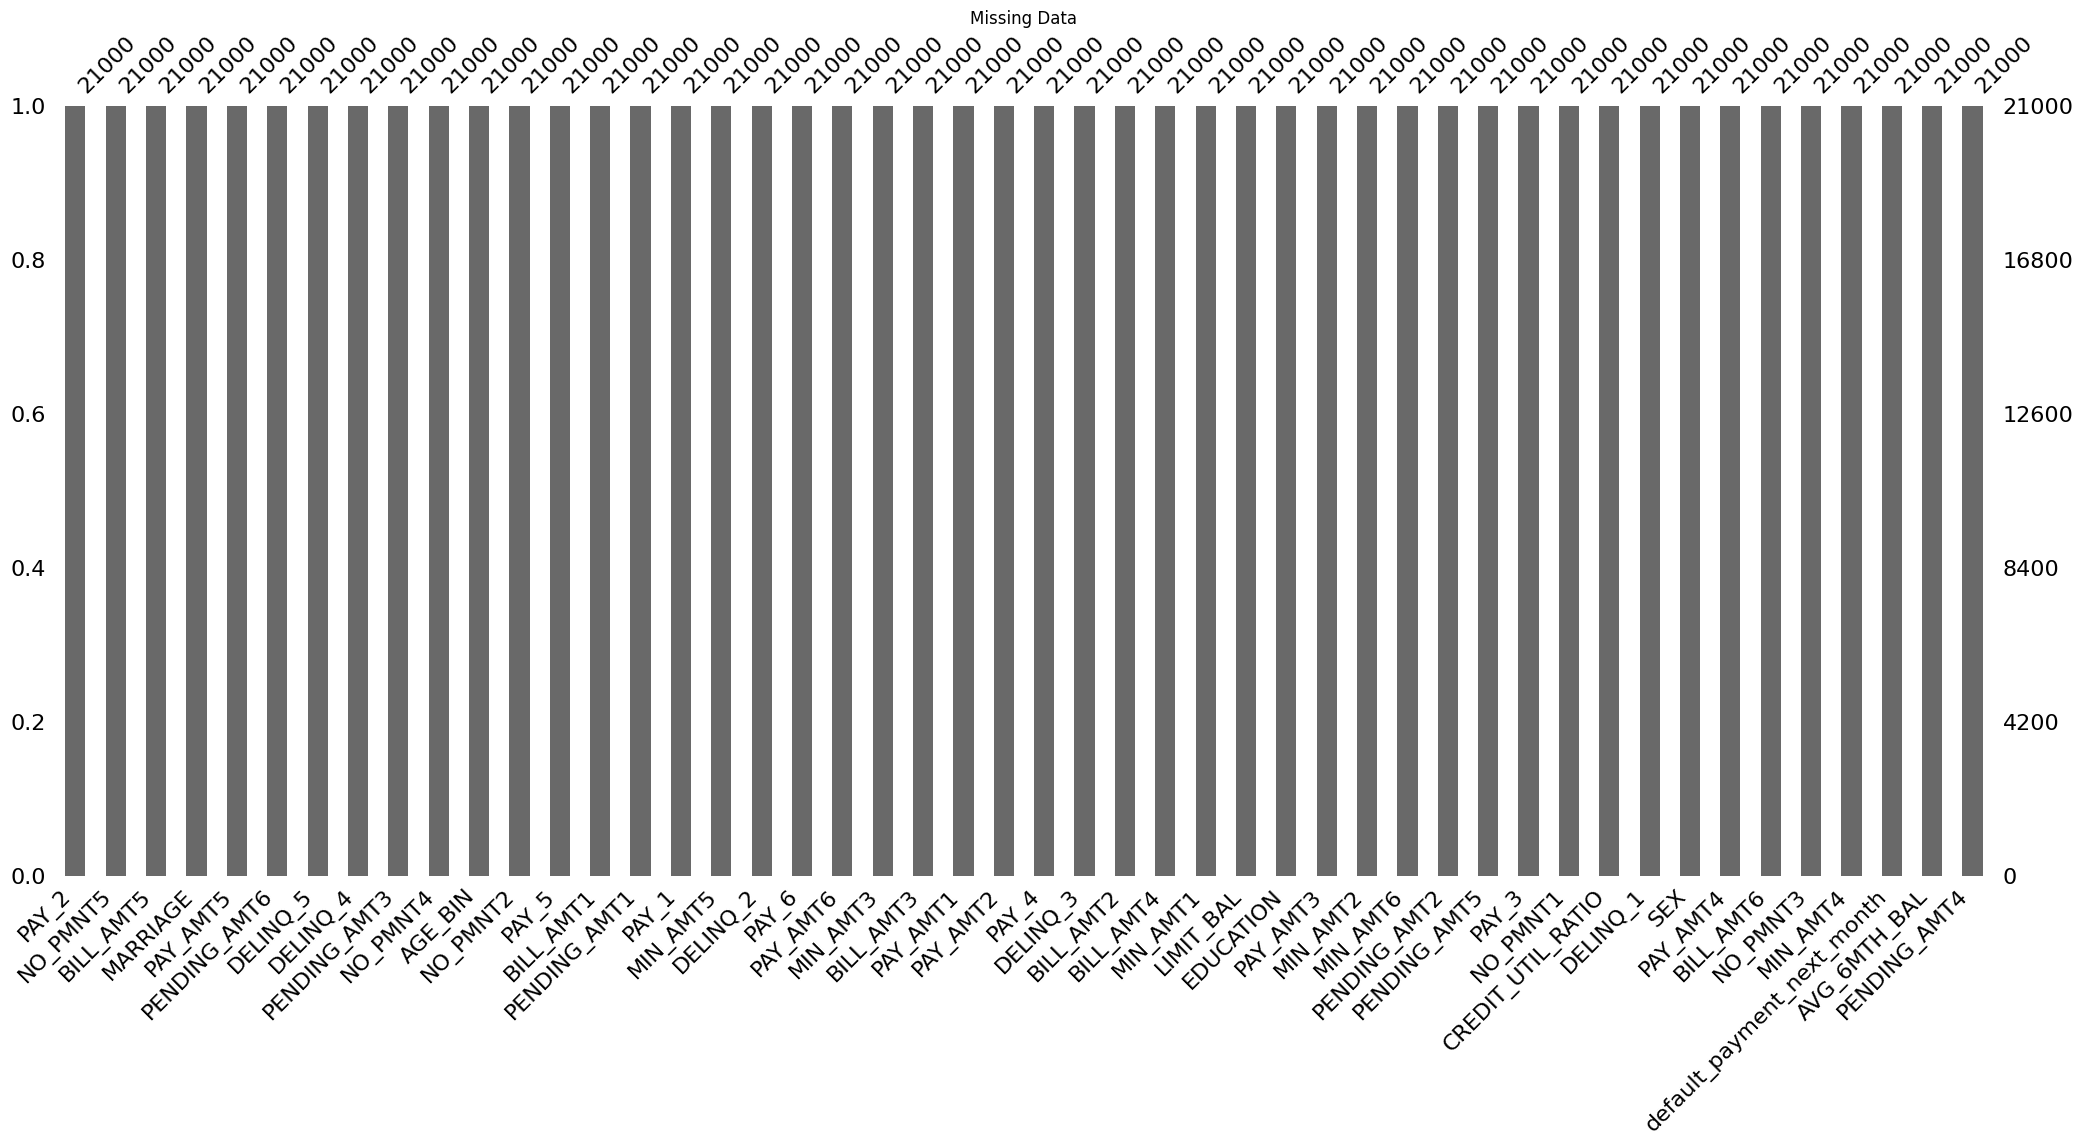

In [123]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing data
msno.bar(final_train_df)
plt.title('Missing Data')
plt.show()


There is no missing data in the entire dataset, so we have nothing to worry about substituting for any missing values.



In [124]:
final_train_df.describe()

,PAY_2,NO_PMNT5,BILL_AMT5,MARRIAGE,PAY_AMT5,PENDING_AMT6,DELINQ_5,DELINQ_4,PENDING_AMT3,NO_PMNT4,NO_PMNT2,PAY_5,BILL_AMT1,PENDING_AMT1,PAY_1,MIN_AMT5,DELINQ_2,PAY_6,PAY_AMT6,MIN_AMT3,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_4,DELINQ_3,BILL_AMT2,BILL_AMT4,MIN_AMT1,LIMIT_BAL,EDUCATION,PAY_AMT3,MIN_AMT2,MIN_AMT6,PENDING_AMT2,PENDING_AMT5,PAY_3,NO_PMNT1,CREDIT_UTIL_RATIO,DELINQ_1,SEX,PAY_AMT4,BILL_AMT6,NO_PMNT3,MIN_AMT4,default_payment_next_month,AVG_6MTH_BAL,PENDING_AMT4
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.00000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,2.100000e+04,21000.00000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04
mean,-0.127238,0.224048,40398.551095,1.551714,4797.012952,33719.457238,0.439714,0.863905,1.499454e+05,0.439524,0.820048,-0.260952,51501.542381,2.393011e+05,-0.01119,3371.945724,1.853905,-0.288667,5211.736762,10791.519586,4.723258e+04,5686.349333,5.923003e+03,-0.21819,1.343857,49463.502667,43387.372476,19348.594748,167214.746667,1.854190,5202.325333,14994.544829,3893.119400,1.934859e+05,6.932100e+04,-0.164857,0.998143,0.334545,2.386048,1.607571,4793.172000,38931.194000,0.639952,6932.099538,0.221190,39883.523421,1.079152e+05
std,1.198957,0.416964,60396.811177,0.521176,15270.031988,59658.209417,0.496364,0.905482,2.342018e+05,0.706086,1.219064,1.141454,73453.641859,3.620954e+05,1.12321,5965.820942,1.702109,1.151592,17698.795697,17228.671178,6.953988e+04,16868.075695,2.390953e+04,1.17221,1.306061,70866.586004,64081.073110,29694.656633,128965.188482,0.791628,17006.416467,23420.176284,5919.649923,2.969466e+05,1.142857e+05,1.198624,1.444481,0.340016,2.088810,0.488303,15467.403159,59196.499234,0.974670,11428.571776,0.415058,60349.229534,1.722867e+05
min,-2.000000,0.000000,-81334.000000,0.000000,0.000000,-528466.000000,0.000000,0.000000,-8.990420e+05,0.000000,0.000000,-2.000000,-14386.000000,-2.671514e+06,-2.00000,-52846.600000,0.000000,-2.000000,0.000000,-44665.100000,-1.572640e+05,0.000000,0.000000e+00,-2.00000,0.000000,-69777.000000,-170000.000000,-193777.000000,10000.000000,0.000000,0.000000,-89904.200000,-20905.100000,-1.937770e+06,-4.606900e+05,-2.000000,0.000000,-1.309566,0.000000,1.000000,0.000000,-209051.000000,0.000000,-46069.000000,0.000000,-445252.333333,-4.466510e+05
25%,-1.000000,0.000000,1759.000000,1.000000,241.000000,0.000000,0.000000,0.000000,1.666500e+03,0.000000,0.000000,-1.000000,3564.750000,4.770750e+03,-1.00000,0.000000,0.000000,-1.000000,102.000000,78.000000,2.686250e+03,998.250000,8.360000e+02,-1.00000,0.000000,3000.000000,2332.000000,294.475000,50000.000000,1.000000,390.000000,166.650000,124.275000,2.944750e+03,0.000000e+00,-1.000000,0.000000,0.004904,0.000000,1.000000,284.000000,1242.750000,0.000000,0.000000,0.000000,795.125000,7.800000e+02
50%,0.000000,0.000000,18266.500000,2.000000,1500.000000,14025.500000,0.000000,1.000000,6.392700e+04,0.000000,0.000000,0.000000,22578.000000,1.026385e+05,0.00000,1402.550000,2.000000,0.000000,1500.000000,4445.200000,2.024200e+04,2100.000000,2.011000e+03,0.00000,1.000000,21550.000000,19158.500000,8298.250000,140000.000000,2.000000,1811.500000,6392.700000,1720.350000,8.298250e+04,2.762200e+04,0.000000,0.000000,0.240150,3.000000,2.000000,1500.000000,17203.500000,0.000000,2762.200000,0.000000,17106.416667,4.445200e+04
75%,0.000000,0.000000,50517.250000,2.000000,4051.000000,46390.750000,1.000000,2.000000,1.926350e+05,1.000000,1.000000,0.000000,67876.250000,3.096658e+05,0.00000,4639.075000,4.000000,0.000000,4000.000000,13936.875000,6.082675e+04,5023.250000,5.000000e+03,0.00000,3.000000,64918.250000,55376.750000,24888.37500

There are 21,000 distinct credit card clients.

The average value for the amount of credit card limit is 167,214. The standard deviation is unusually large (at 128,965), and the max value is 800,000.

We observe -ve values in BILL_AMT* and PAY_AMT*

Let us analyze all of this in detail.

#                     Univariate Analysis



## Target Variable


We will first look at the target variable, i.e., default_payment_next_month. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.




In [125]:
final_train_df['default_payment_next_month'].value_counts()

0    16355
1     4645
Name: default_payment_next_month, dtype: int64

In [126]:

# Count the occurrences of each category
count_data = final_train_df['default_payment_next_month'].value_counts().reset_index()

# Create a bar plot using Plotly with deeper and lighter shades of blue
fig = px.bar(count_data, x='index', y='default_payment_next_month', color='index',
             color_continuous_scale=px.colors.sequential.Blues)

# Set the axis labels
fig.update_layout(xaxis_title='Default Payment Next Month', yaxis_title='Count')

# Show the plot
fig.show()


Let us print proportions instead of number.



In [127]:
final_train_df['default_payment_next_month'].value_counts(normalize=True)

0    0.77881
1    0.22119
Name: default_payment_next_month, dtype: float64

In [128]:


# Calculate the normalized value counts
normalized_counts = final_train_df['default_payment_next_month'].value_counts(normalize=True)

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=normalized_counts.index, y=normalized_counts, marker_color='blue')])

# Set the axis labels
fig.update_layout(xaxis_title='Default Payment Next Month', yaxis_title='Normalized Count')

# Show the plot
fig.show()


Clearly see that 22% of the customers shall be defaulting on their payments next month.

The global benchmark for payment default is less than 2%.

This is an extremely high number of defaulting customers.

Also, while this can be called an "Imbalanced dataset", this should have been far more imbalanced if we consider that only 2-3% customers should have been classified as defaulting.


Now lets visualize each variable separately.

Let’s visualize the categorical and ordinal features first.


##              Independent Variable (Categorical)



In [129]:
# Calculate the normalized value counts
normalized_counts = final_train_df['SEX'].value_counts(normalize=True)

# Define the colors for each category
colors = ['pink', 'blue']

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=normalized_counts.index, y=normalized_counts, marker_color=colors)])

# Set the axis labels and title
fig.update_layout(xaxis_title='SEX', yaxis_title='Normalized Count', title='SEX Distribution')

# Show the plot
fig.show()

It can be inferred from the above bar plot that about 60% of the customers are females.

Please note that our initial hypothesis was that our male - female ratio is same.



Now let’s visualize the ordinal variables.


##                        Independent Variables (Ordinal)



In [130]:


# Create subplots
fig = subplots.make_subplots(rows=1, cols=2)

# Plot for 'MARRIAGE'
fig.add_trace(go.Bar(x=final_train_df['MARRIAGE'].value_counts().index,
                     y=final_train_df['MARRIAGE'].value_counts(normalize=True),
                     marker=dict(color=px.colors.sequential.Blues_r)),
              row=1, col=1)

# Plot for 'EDUCATION'
fig.add_trace(go.Bar(x=final_train_df['EDUCATION'].value_counts().index,
                     y=final_train_df['EDUCATION'].value_counts(normalize=True),
                     marker=dict(color=px.colors.sequential.Blues_r)),
              row=1, col=2)

# Update layout
fig.update_layout(title_text='MARRIAGE and EDUCATION', showlegend=False)

# Show the plot
fig.show()


In [69]:

# Create a bar chart using Plotly for 'AGE_BIN'
fig = px.bar(final_train_df['AGE_BIN'].value_counts(normalize=True),
             color=final_train_df['AGE_BIN'].value_counts().index,
             color_continuous_scale='Blues')

# Update layout
fig.update_layout(title='AGE', xaxis_title='Age Group', yaxis_title='Proportion')

# Show the plot
fig.show()


Following inferences can be made from the above bar plots:

1. About 55% of the customers are 'Single' status

2. About 44% of the customers are 'Married' status

3. About 0.5% of the customers have 'Other'

4. About 0.5% of the customers have 'Invalid' status (with a Value = 0)

5. About 50% of the customers have 'University' level education

6. About 35% of the customers have 'Graduate School' level education

7. About 14% of the customers have 'High School' level education

8. About 0.4% of the customers have 'Other' level education

9. About 0.6% of the customers have 'Invalid' level education (with Values = 0, 5, 6)

10. Majority of the customers are in 20 - 50 years Age bracket

11. We also see lot customers in 51-75 years Age bracket


##                   Independent Variable (Numerical)


Now lets visualize the numerical variables. Lets look at the distribution of 'LIMIT_BAL' first.



In [131]:
import plotly.graph_objects as go
import plotly.subplots as sp

# Create a subplot figure with two subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Distribution', 'Box Plot'))

# Add histogram subplot
fig.add_trace(go.Histogram(x=final_train_df['LIMIT_BAL'], marker=dict(color='blue'), name='Distribution'), row=1, col=1)

# Add box plot subplot
fig.add_trace(go.Box(x=final_train_df['LIMIT_BAL'], marker=dict(color='blue'), name='Box Plot'), row=1, col=2)

# Update layout
fig.update_layout(title='LIMIT_BAL', height=400, width=800)

# Show the plot
fig.show()


Let us try to place the LIMIT_BAL in 20 bins and see the distribution.



In [132]:
import plotly.graph_objects as go

# Set the number of bins
bins = 20

# Create a histogram trace
histogram_trace = go.Histogram(x=final_train_df['LIMIT_BAL'], nbinsx=bins, marker=dict(color='blue'), opacity=0.5)

# Create the layout
layout = go.Layout(
    title='Fig.1: Credit Limit',
    xaxis=dict(title='Credit Limit (NT dollar)'),
    yaxis=dict(title='Number of Accounts'),
    showlegend=True
)

# Create the figure
figure = go.Figure(data=[histogram_trace], layout=layout)

# Show the figure
figure.show()


We can clearly see that very few customers have credit limit exceeding 6,00,000.

Let us count how many customers belong to this categoty.



In [133]:
len(final_train_df[final_train_df['LIMIT_BAL']>= 600000])

57

We see that we have 57 customers out of 21000 which appear as outliers, which is about 0.03%

In [134]:
len(final_train_df[(final_train_df['LIMIT_BAL']>= 600000) & (final_train_df['default_payment_next_month']== 1)])

7

It can be inferred that most of the data in the distribution of 'LIMIT_BAL' is towards left (right-skewed), which means it is not normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values.

Please note that from the Box Plot, the inference about the outliers is drawn based on the mathematical hypothesis that anything outside of "Inter-Quartile-Range (IQR)" is considered Outlier.

From the Business perspective this may not always be true. There could be genuin transactions with large values in the dataset. Removing them may not be the correct way in such cases.

I might need the ask  about the correctness of these values.

In case they seem to be data entry errors, they can safely be either removed (OR) substituted with mean / mode / median values.

**(OR)**

If we find that there are relatively very few (say less that 3-5%) significant outliers whose presence is likely to bias the model, we can take a decision to remove these outliers.

I will probe into these outliers carefully.



Similar to LIMIT_BAL, let us see if we also have outliers for BILL_AMT* and PAY_AMT* variables.



In [135]:
import plotly.graph_objects as go
import plotly.subplots as sp

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Distribution Plot', 'Box Plot'))

# Add distribution plot
fig.add_trace(go.Histogram(x=final_train_df['BILL_AMT1'], name='Distribution Plot'), row=1, col=1)

# Add box plot
fig.add_trace(go.Box(x=final_train_df['BILL_AMT1'], name='Box Plot'), row=1, col=2)

# Update layout
fig.update_layout(title='Fig.1: Bill Amount 1', showlegend=False)

# Show the figure
fig.show()


In [136]:

# Create the histogram trace
histogram_trace = go.Histogram(x=final_train_df['BILL_AMT1'], nbinsx=20, opacity=0.8, name='Total')

# Create the layout
layout = go.Layout(
    title='Bill Amount Sep-2005',
    xaxis=dict(title='Bill Amount Sep-2005 (NT dollar)'),
    yaxis=dict(title='Number of Accounts'),
    showlegend=True
)

# Create the figure and add the trace
fig = go.Figure(data=[histogram_trace], layout=layout)

# Show the figure
fig.show()


In [143]:
import plotly.subplots as subplots

# Create the histogram trace
histogram_trace = go.Histogram(x=final_train_df['BILL_AMT2'], opacity=0.8, name='Histogram')

# Create the box plot trace
box_plot_trace = go.Box(y=final_train_df['BILL_AMT2'], name='Box Plot')

# Create the subplots
fig = subplots.make_subplots(rows=1, cols=2, subplot_titles=('Histogram', 'Box Plot'))

# Add the traces to the subplots
fig.add_trace(histogram_trace, row=1, col=1)
fig.add_trace(box_plot_trace, row=1, col=2)

# Update the layout
fig.update_layout(title='Bill Amount Feb-2005',
                  xaxis=dict(title='Bill Amount Feb-2005 (NT dollar)'),
                  yaxis=dict(title='Number of Accounts'),
                  showlegend=True)

# Show the figure
fig.show()


In [144]:

# Create the histogram trace
histogram_trace = go.Histogram(x=final_train_df['BILL_AMT2'], nbinsx=20, opacity=0.8, name='Total')

# Create the layout
layout = go.Layout(
    title='Bill Amount Aug-2005',
    xaxis=dict(title='Bill Amount Aug-2005 (NT dollar)'),
    yaxis=dict(title='Number of Accounts'),
    showlegend=True
)

# Create the figure
figure = go.Figure(data=[histogram_trace], layout=layout)

# Show the figure
figure.show()


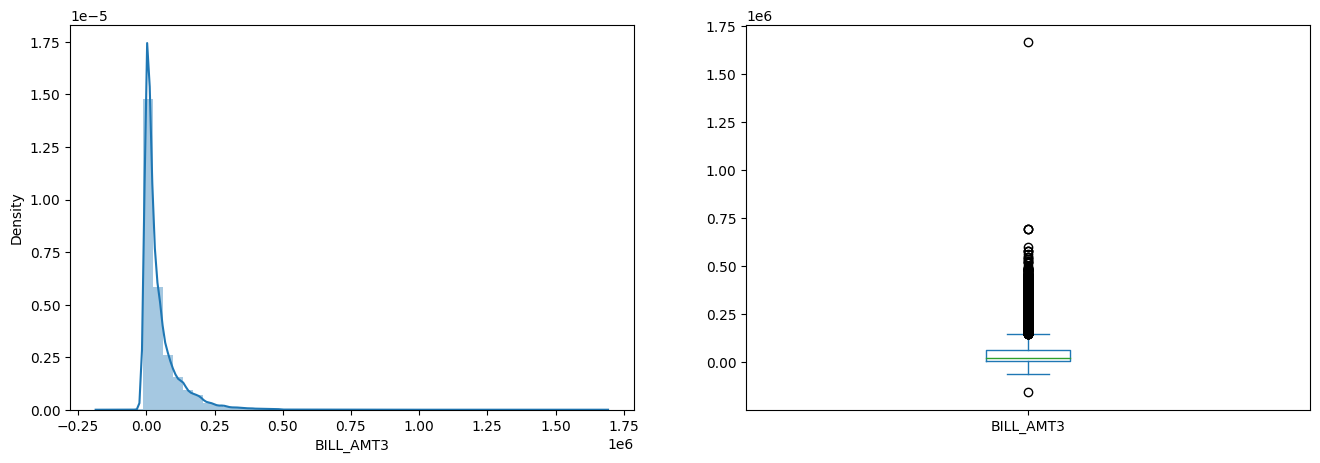

In [145]:
plt.figure(1)
plt.subplot(121)
sns.distplot(final_train_df['BILL_AMT3']);
plt.subplot(122)
final_train_df['BILL_AMT3'].plot.box(figsize=(16,5))
plt.show()

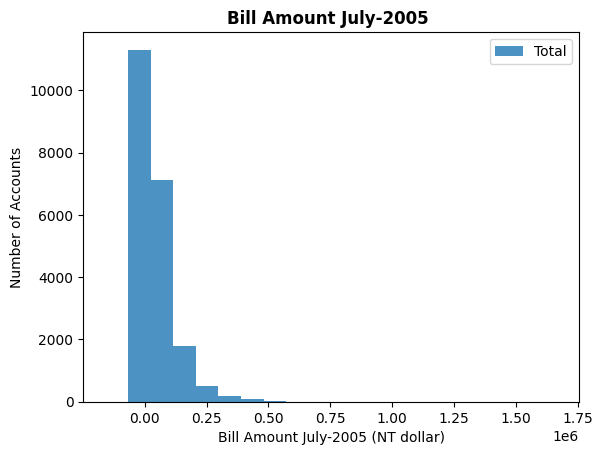

In [146]:
bins = 20
plt.hist(final_train_df.BILL_AMT3, bins = bins, label = 'Total', alpha=0.8)

plt.xlabel('Bill Amount July-2005 (NT dollar)');plt.ylabel('Number of Accounts')
plt.title('Bill Amount July-2005 ',fontweight="bold", size=12)
plt.legend();
plt.show()

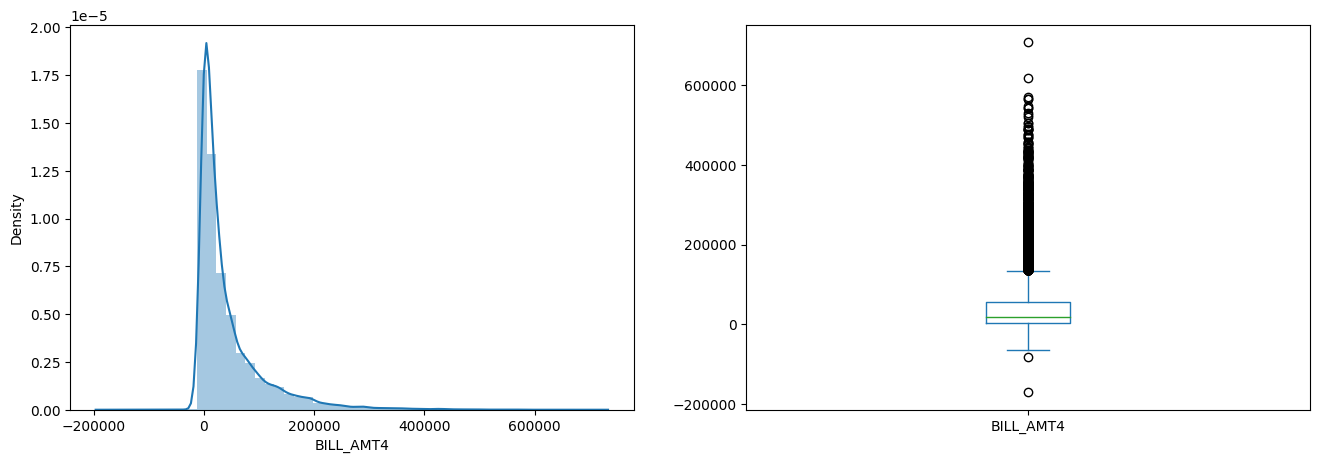

In [147]:
plt.figure(1)
plt.subplot(121)
sns.distplot(final_train_df['BILL_AMT4']);
plt.subplot(122)
final_train_df['BILL_AMT4'].plot.box(figsize=(16,5))
plt.show()

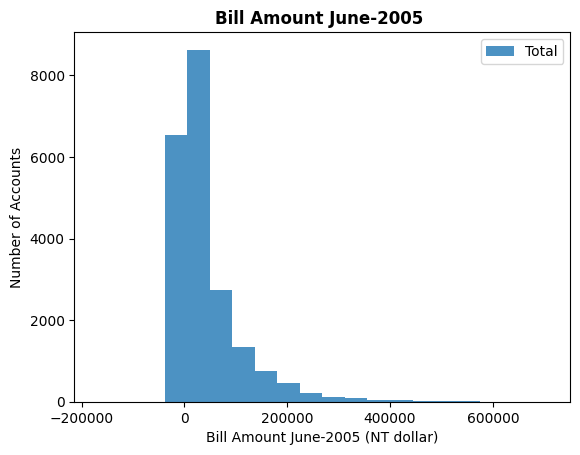

In [148]:
bins = 20
plt.hist(final_train_df.BILL_AMT4, bins = bins, label = 'Total', alpha=0.8)

plt.xlabel('Bill Amount June-2005 (NT dollar)');plt.ylabel('Number of Accounts')
plt.title('Bill Amount June-2005 ',fontweight="bold", size=12)
plt.legend();
plt.show()

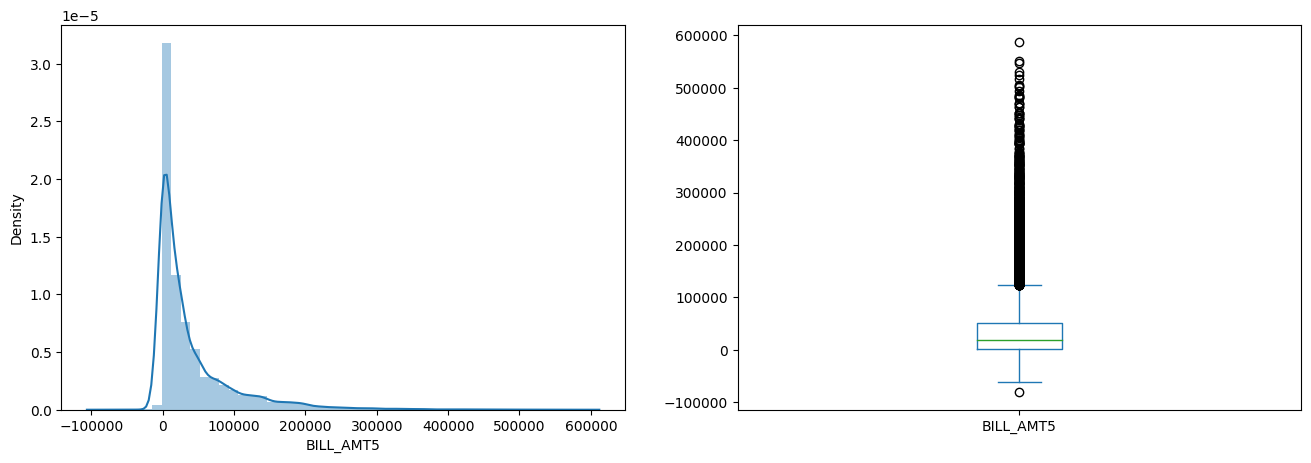

In [149]:
plt.figure(1)
plt.subplot(121)
sns.distplot(final_train_df['BILL_AMT5']);
plt.subplot(122)
final_train_df['BILL_AMT5'].plot.box(figsize=(16,5))
plt.show()

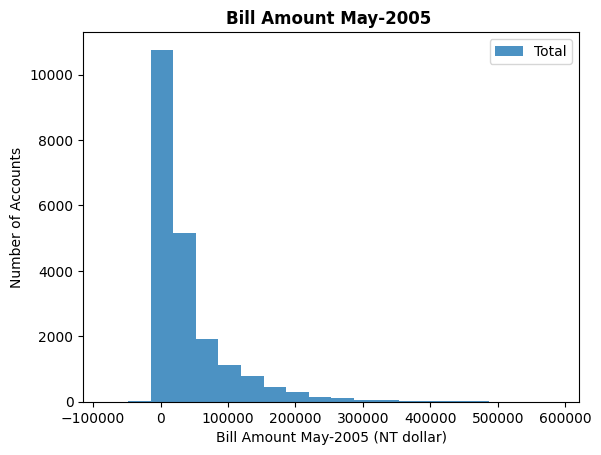

In [150]:
bins = 20
plt.hist(final_train_df.BILL_AMT5, bins = bins, label = 'Total', alpha=0.8)

plt.xlabel('Bill Amount May-2005 (NT dollar)');plt.ylabel('Number of Accounts')
plt.title('Bill Amount May-2005 ',fontweight="bold", size=12)
plt.legend();
plt.show()

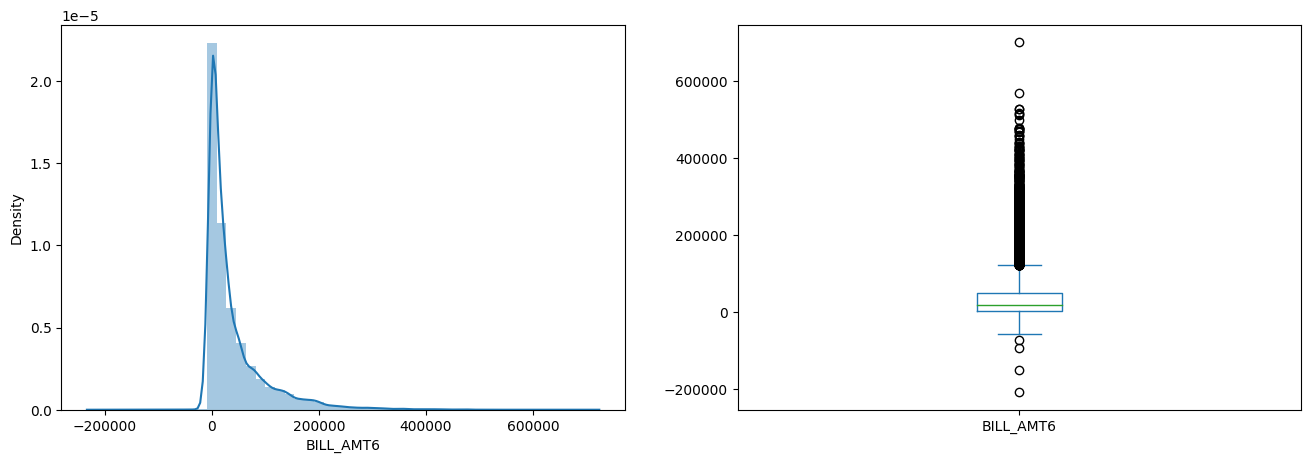

In [151]:
plt.figure(1)
plt.subplot(121)
sns.distplot(final_train_df['BILL_AMT6']);
plt.subplot(122)
final_train_df['BILL_AMT6'].plot.box(figsize=(16,5))
plt.show()

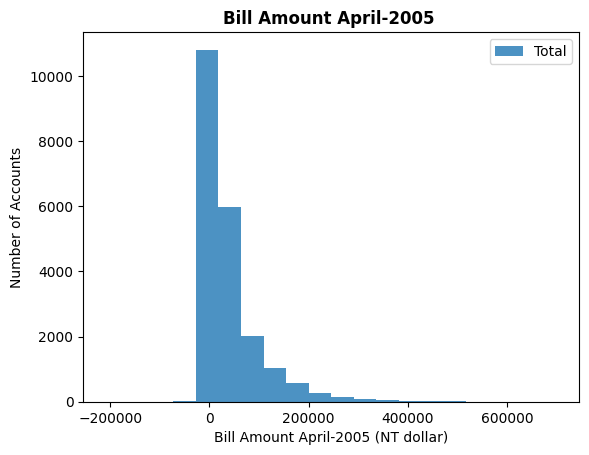

In [152]:
bins = 20
plt.hist(final_train_df.BILL_AMT6, bins = bins, label = 'Total', alpha=0.8)

plt.xlabel('Bill Amount April-2005 (NT dollar)');plt.ylabel('Number of Accounts')
plt.title('Bill Amount April-2005 ',fontweight="bold", size=12)
plt.legend();
plt.show()

The plots for all the BILL_AMT* show very skewed distributions.

We should closely analyze the customers with BILL_AMT* >= 200000, as well as with BILL_AMT* < 0.

Let us loot at the -ve values first.



In [153]:
final_train_df[final_train_df['BILL_AMT1'] <0][['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
18,-8,2046,0,409,872,1539
44,-260,-2835,3960,10410,2361,2868
55,-1651,-5469,-7292,-10938,5887,3882
112,-2012,-2012,47714,48685,18139,18519
125,-224,1357,3446,4969,0,2650
...,...,...,...,...,...,...
20807,-3,583,-17,3440,1368,146
20839,-11,-11,-11,2894,0,530
20942,-200,-200,0,2115,0,0
20966,-512,-512,-512,-512,-508,-913


In [154]:

final_train_df[final_train_df['BILL_AMT2'] <0][['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
44,-260,-2835,3960,10410,2361,2868
55,-1651,-5469,-7292,-10938,5887,3882
86,899,-1,-1,228,1374,380
112,-2012,-2012,47714,48685,18139,18519
194,-1,-1,-1,-1,-1,219
...,...,...,...,...,...,...
20839,-11,-11,-11,2894,0,530
20884,3544,-36,163,163,1772,148
20942,-200,-200,0,2115,0,0
20966,-512,-512,-512,-512,-508,-913


We clearly see -ve bill values indicating perhaps some amount of excess payment in previous months.


In [155]:
for billamt in ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']:
    print("\nNo. of Customers with ", billamt, " >= 200000 : ", len(final_train_df[final_train_df[billamt] >=200000]))


No. of Customers with  BILL_AMT1  >= 200000 :  1070

No. of Customers with  BILL_AMT2  >= 200000 :  971

No. of Customers with  BILL_AMT3  >= 200000 :  869

No. of Customers with  BILL_AMT4  >= 200000 :  707

No. of Customers with  BILL_AMT5  >= 200000 :  608

No. of Customers with  BILL_AMT6  >= 200000 :  569


In [156]:
for billamt in ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']:
    print("\nNo. of Customers with ", billamt, " >= 400000 : ", len(final_train_df[final_train_df[billamt] >=400000]))


No. of Customers with  BILL_AMT1  >= 400000 :  119

No. of Customers with  BILL_AMT2  >= 400000 :  99

No. of Customers with  BILL_AMT3  >= 400000 :  95

No. of Customers with  BILL_AMT4  >= 400000 :  66

No. of Customers with  BILL_AMT5  >= 400000 :  48

No. of Customers with  BILL_AMT6  >= 400000 :  42


In [157]:
for billamt in ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']:
    print("\nNo. of Customers with ", billamt, " >= 600000 : ", len(final_train_df[final_train_df[billamt] >=600000]))


No. of Customers with  BILL_AMT1  >= 600000 :  6

No. of Customers with  BILL_AMT2  >= 600000 :  4

No. of Customers with  BILL_AMT3  >= 600000 :  4

No. of Customers with  BILL_AMT4  >= 600000 :  2

No. of Customers with  BILL_AMT5  >= 600000 :  0

No. of Customers with  BILL_AMT6  >= 600000 :  1


We observe from Sept-2005 billing that 6 customers have billing in excess of 600,000, 119 customers have billing in excess of 400,000 and 1070 customers have billing in excess of 200,000.

With good understanding of the BILL_AMT* variables, we will now look at the PAY_AMT* variables.



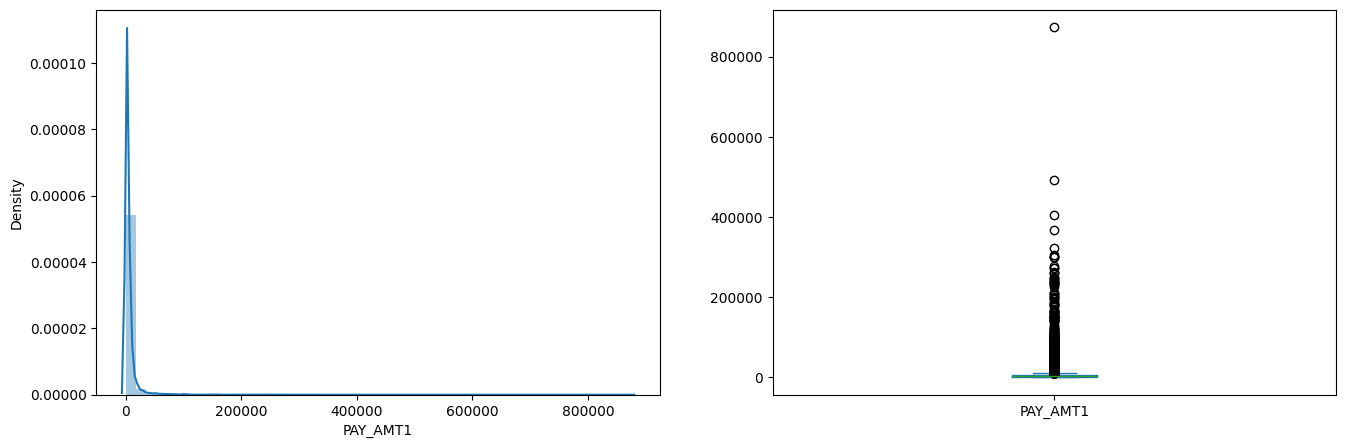

In [158]:
plt.figure(1)
plt.subplot(121)
sns.distplot(final_train_df['PAY_AMT1']);
plt.subplot(122)
final_train_df['PAY_AMT1'].plot.box(figsize=(16,5))
plt.show()

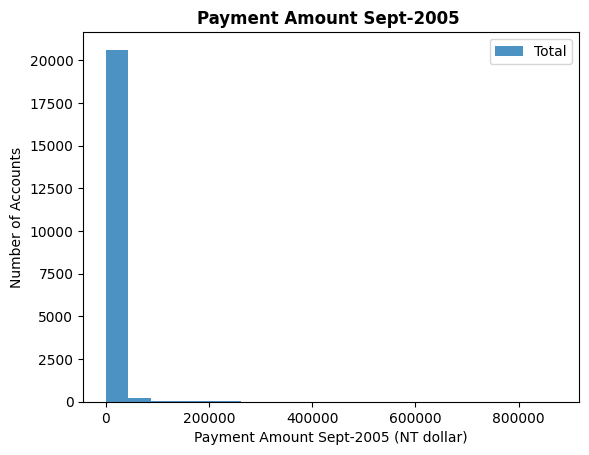

In [159]:
bins = 20
plt.hist(final_train_df.PAY_AMT1, bins = bins, label = 'Total', alpha=0.8)

plt.xlabel('Payment Amount Sept-2005 (NT dollar)');plt.ylabel('Number of Accounts')
plt.title('Payment Amount Sept-2005 ',fontweight="bold", size=12)
plt.legend();
plt.show()

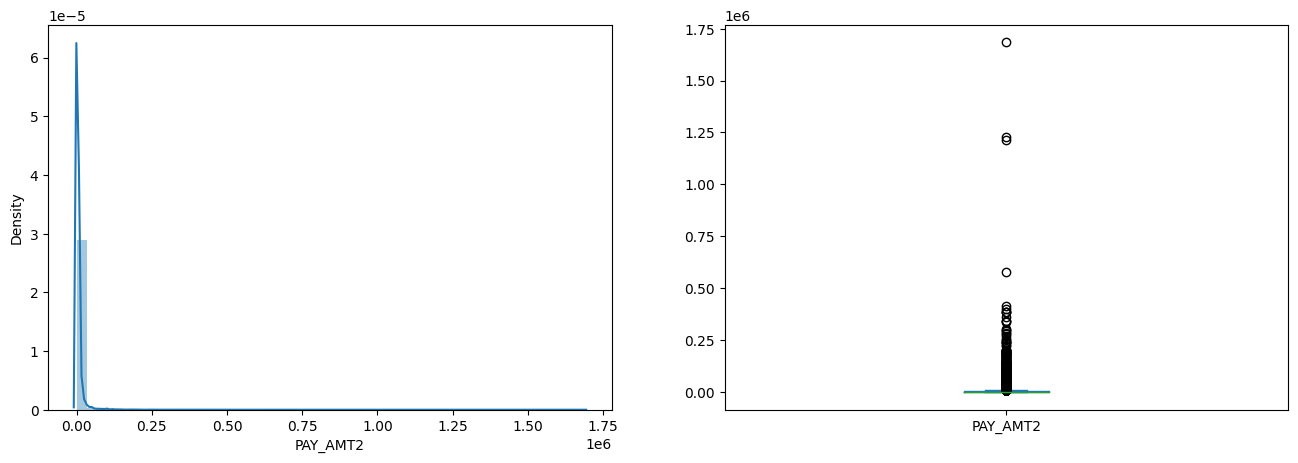

In [160]:
plt.figure(1)
plt.subplot(121)
sns.distplot(final_train_df['PAY_AMT2']);
plt.subplot(122)
final_train_df['PAY_AMT2'].plot.box(figsize=(16,5))
plt.show()

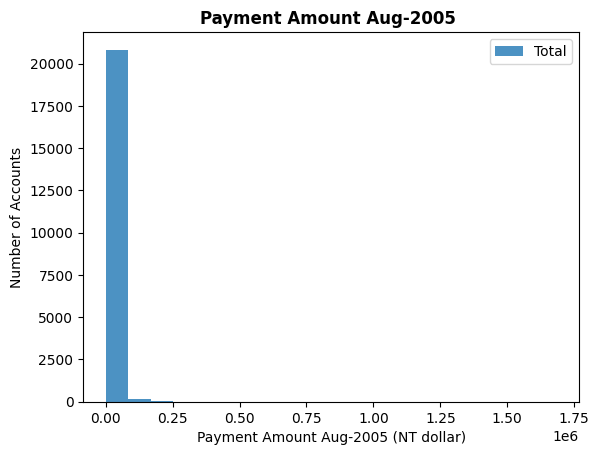

In [161]:
bins = 20
plt.hist(final_train_df.PAY_AMT2, bins = bins, label = 'Total', alpha=0.8)

plt.xlabel('Payment Amount Aug-2005 (NT dollar)');plt.ylabel('Number of Accounts')
plt.title('Payment Amount Aug-2005 ',fontweight="bold", size=12)
plt.legend();
plt.show()

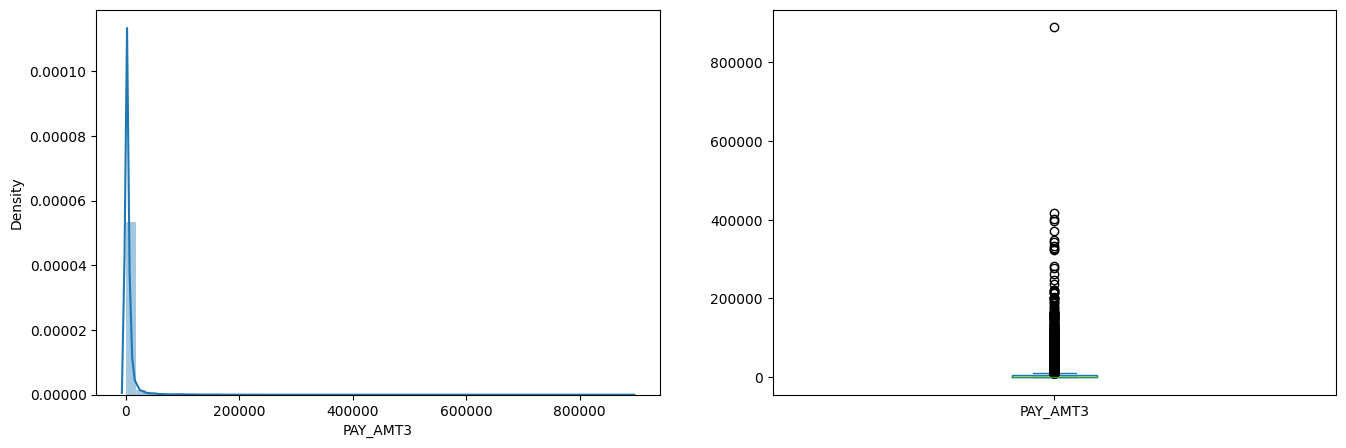

In [162]:
plt.figure(1)
plt.subplot(121)
sns.distplot(final_train_df['PAY_AMT3']);
plt.subplot(122)
final_train_df['PAY_AMT3'].plot.box(figsize=(16,5))
plt.show()

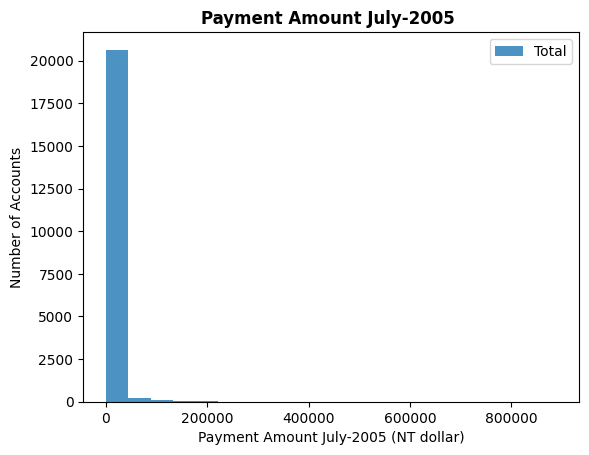

In [163]:
bins = 20
plt.hist(final_train_df.PAY_AMT3, bins = bins, label = 'Total', alpha=0.8)

plt.xlabel('Payment Amount July-2005 (NT dollar)');plt.ylabel('Number of Accounts')
plt.title('Payment Amount July-2005 ',fontweight="bold", size=12)
plt.legend();
plt.show()

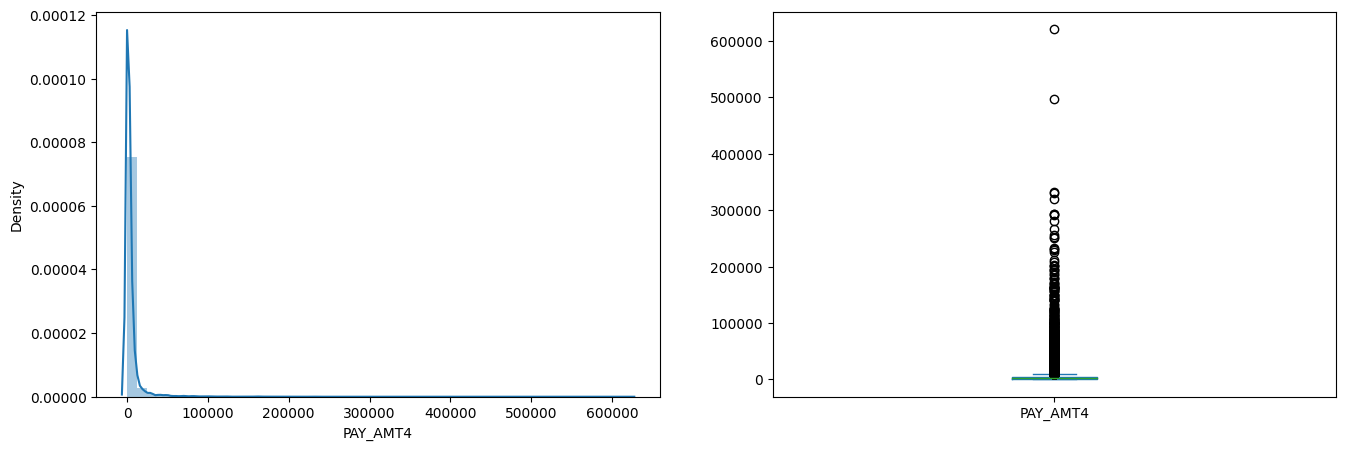

In [164]:
plt.figure(1)
plt.subplot(121)
sns.distplot(final_train_df['PAY_AMT4']);
plt.subplot(122)
final_train_df['PAY_AMT4'].plot.box(figsize=(16,5))
plt.show()

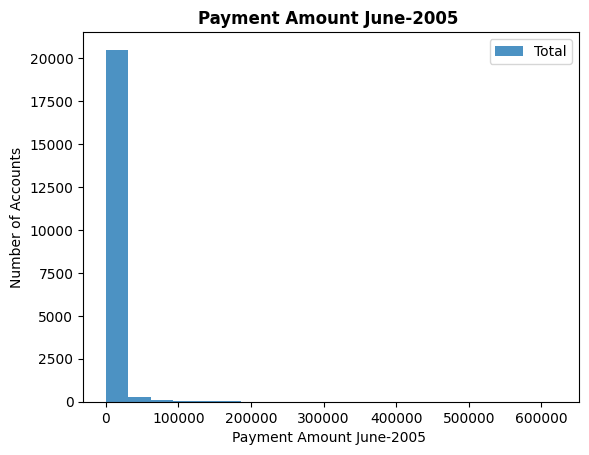

In [165]:
bins = 20
plt.hist(final_train_df.PAY_AMT4, bins = bins, label = 'Total', alpha=0.8)

plt.xlabel('Payment Amount June-2005 ');plt.ylabel('Number of Accounts')
plt.title('Payment Amount June-2005 ',fontweight="bold", size=12)
plt.legend();
plt.show()

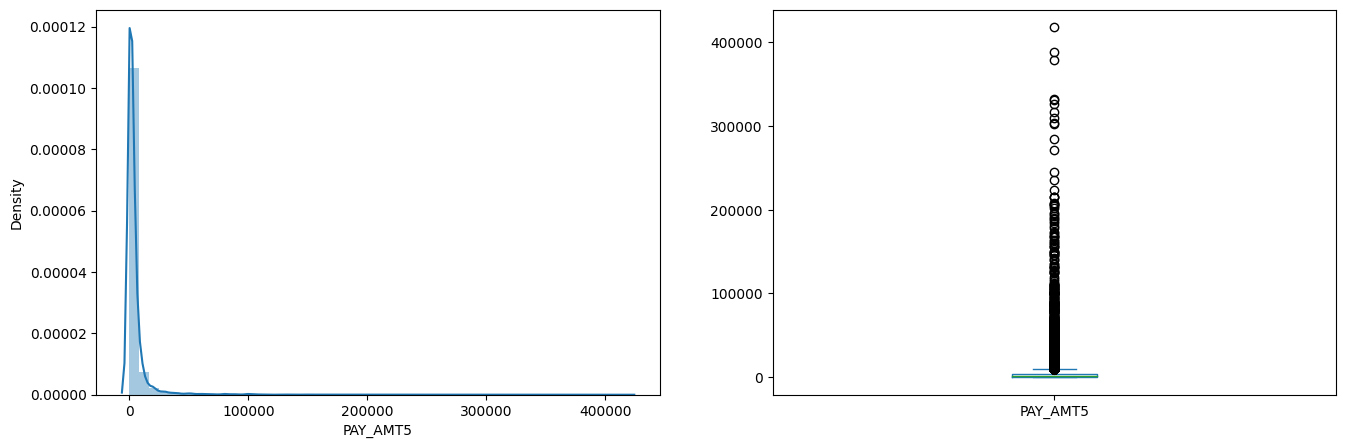

In [166]:
plt.figure(1)
plt.subplot(121)
sns.distplot(final_train_df['PAY_AMT5']);
plt.subplot(122)
final_train_df['PAY_AMT5'].plot.box(figsize=(16,5))
plt.show()

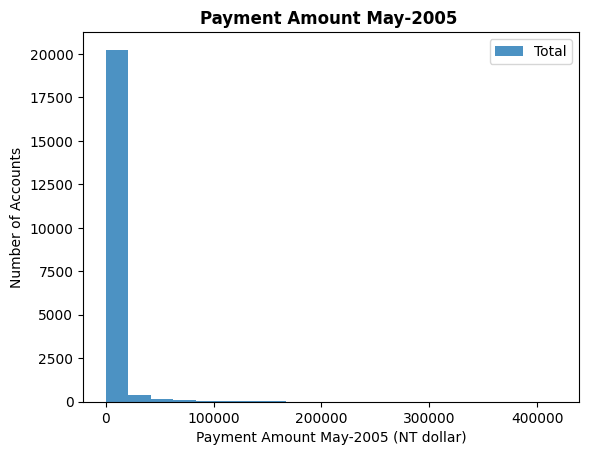

In [167]:
bins = 20
plt.hist(final_train_df.PAY_AMT5, bins = bins, label = 'Total', alpha=0.8)

plt.xlabel('Payment Amount May-2005 (NT dollar)');plt.ylabel('Number of Accounts')
plt.title('Payment Amount May-2005 ',fontweight="bold", size=12)
plt.legend();
plt.show()

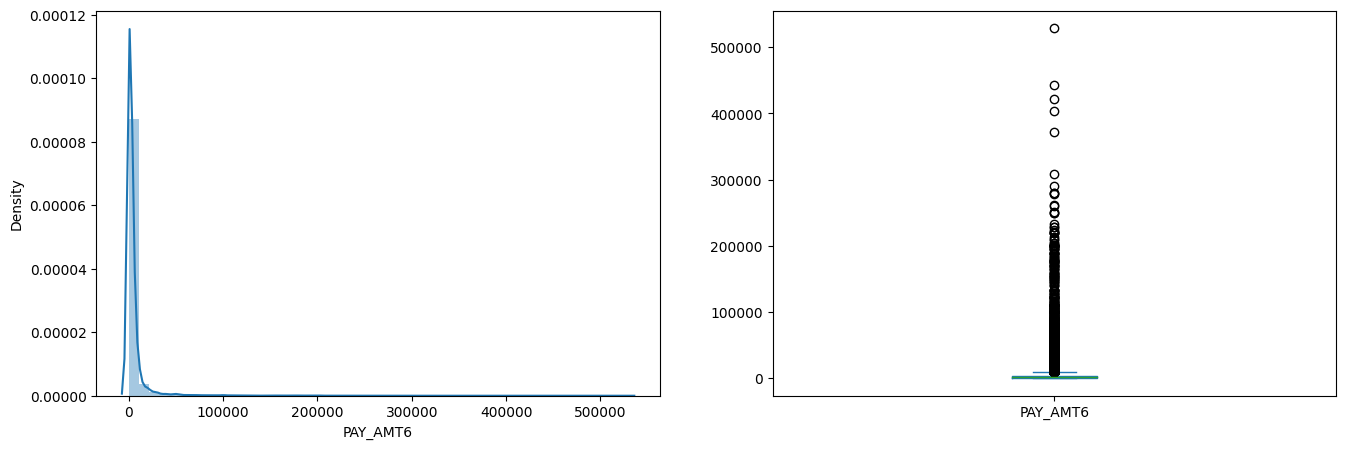

In [168]:
plt.figure(1)
plt.subplot(121)
sns.distplot(final_train_df['PAY_AMT6']);
plt.subplot(122)
final_train_df['PAY_AMT6'].plot.box(figsize=(16,5))
plt.show()

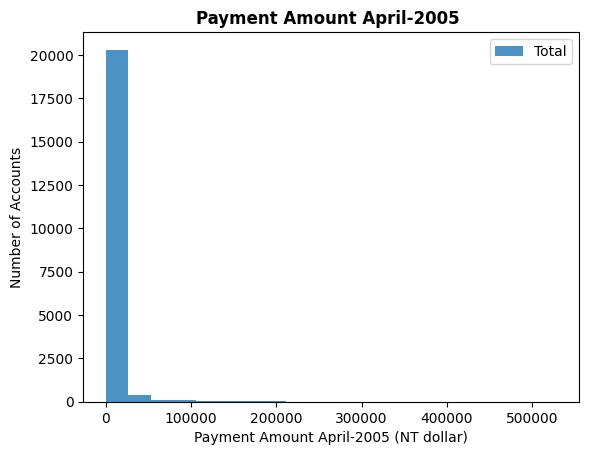

In [169]:
bins = 20
plt.hist(final_train_df.PAY_AMT6, bins = bins, label = 'Total', alpha=0.8)

plt.xlabel('Payment Amount April-2005 (NT dollar)');plt.ylabel('Number of Accounts')
plt.title('Payment Amount April-2005 ',fontweight="bold", size=12)
plt.legend();
plt.show()

From the PAY_AMT* plots, we can easily derive following insights about the customer's payment behavior :


1. Most of the payments seem to be for amounts < 100000.


2. Very few payments are seen for amounts >= 100000.


To get a clearer picture, we may need to divide this data in more bins.

But before we do that, let us compute what % of customers make paymenmts >= 100000.



In [170]:
for pmnt in ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',]:
    print("\nNo. of Customers with ", pmnt, " >= 100000 : ", len(final_train_df[final_train_df[pmnt]>=100000]))


No. of Customers with  PAY_AMT1  >= 100000 :  113

No. of Customers with  PAY_AMT2  >= 100000 :  148

No. of Customers with  PAY_AMT3  >= 100000 :  131

No. of Customers with  PAY_AMT4  >= 100000 :  108

No. of Customers with  PAY_AMT5  >= 100000 :  116

No. of Customers with  PAY_AMT6  >= 100000 :  163


What we see is that out of 21000 customers, about 150+ customers seem to be paying more than 100000 per month for the last 6 months.

Earlier, we saw that the customers with the BILL_AMT* >= 200000 were resulting is the skew, and now we see that the customers with PAY_AMT* >= 100000 are also resulting in the skewed distribution.

What this means is that the resultant model may get biased with these very few customers, but these are not outliers. These are valid records, and must be retained for the analysis and modeling.

Apart from the original variables in the dataset, we had created few additional variables.

Let us analyze this data based on these derived variables as follows:

Let us look at the distribution of 'DELINQ_1', 'NO_PMNT1', 'CREDIT_UTIL_RATIO', and 'AVG_6MTH_BAL'.

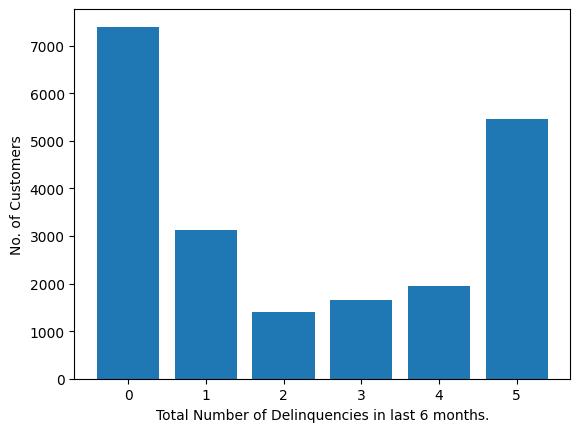

In [171]:
# Let's start by visualizing the distribution of 'DELINQ_1' in the dataset.

fig, ax = plt.subplots()

x = final_train_df.DELINQ_1.unique()

# Counting total delinquencies in the dataset

y = final_train_df.DELINQ_1.value_counts()

# Plotting the bar graph

ax.bar(x, y)
ax.set_xlabel('Total Number of Delinquencies in last 6 months.')
ax.set_ylabel('No. of Customers')
plt.show()


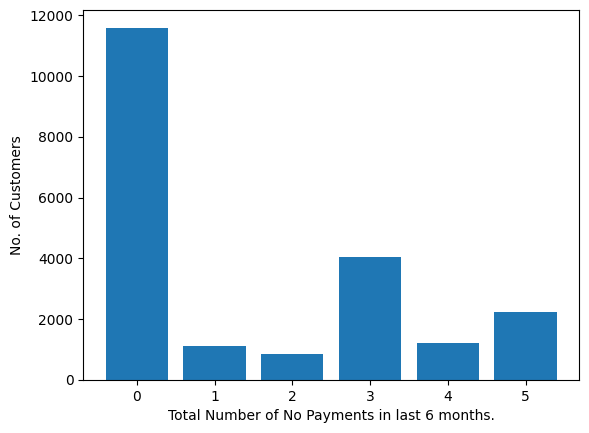

In [172]:
# Let's start by visualizing the distribution of 'NO_PMNT1' in the dataset.

fig, ax = plt.subplots()

x = final_train_df.NO_PMNT1.unique()

# Counting total delinquencies in the dataset

y = final_train_df.NO_PMNT1.value_counts()

# Plotting the bar graph

ax.bar(x, y)
ax.set_xlabel('Total Number of No Payments in last 6 months.')
ax.set_ylabel('No. of Customers')
plt.show()


As the objective of this case is to find who shall default next month, the above bar-graphs need to be analyzed in detail.


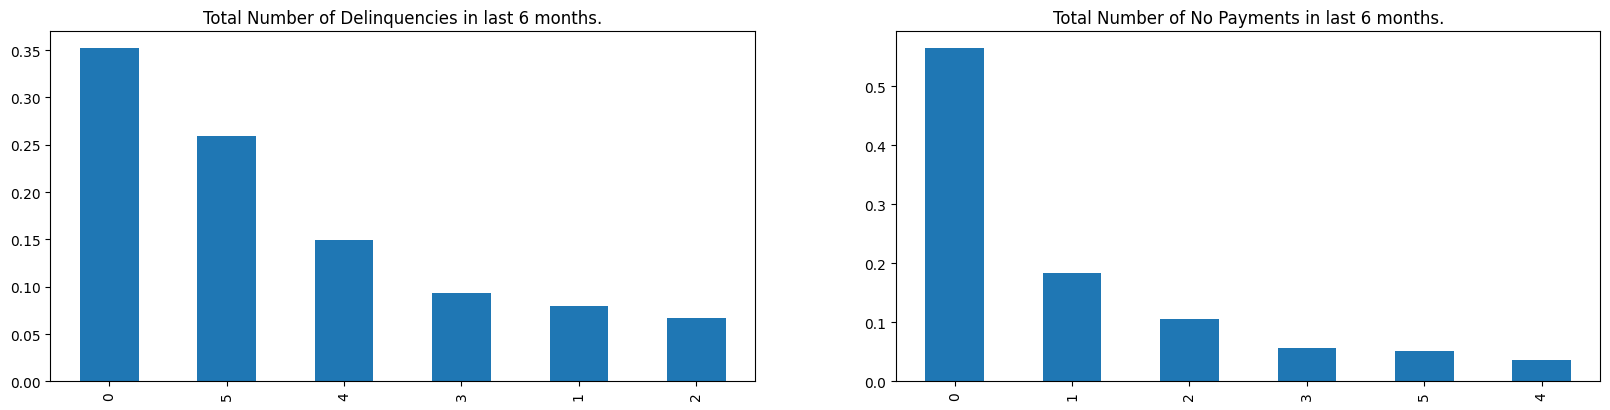

In [173]:
plt.figure(1)
plt.subplot(221)
final_train_df['DELINQ_1'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Total Number of Delinquencies in last 6 months.')
plt.subplot(222)
final_test_df['NO_PMNT1'].value_counts(normalize=True).plot.bar(title= 'Total Number of No Payments in last 6 months.')
plt.show()

The "Number of Delinquencies" bar plot indicates that most of the months, most of the customers are paying less than the "Minimum Payment" required to keep the card active.

So....even if the customers pay, most of the customers are paying less than the Minimum payment required.


**So...ideally the focus of this company should have been to predict customers who shall pay less then the Minimum Payment, rather than customers who make No Payment.**


**That change in strategy and focus would deliver far greater financial and bottom line benefiits to the company in question, rather than focusing on Non Payment.**

To understand this in money terms, let us do few additional computations.

We have created derived variables 'PENDING_AMT*' - which represent amounts that are pending from the customer's side (ie. Bills - Payments) for the last 1 - 6 months.

Let us study the distributions of these derived variables :


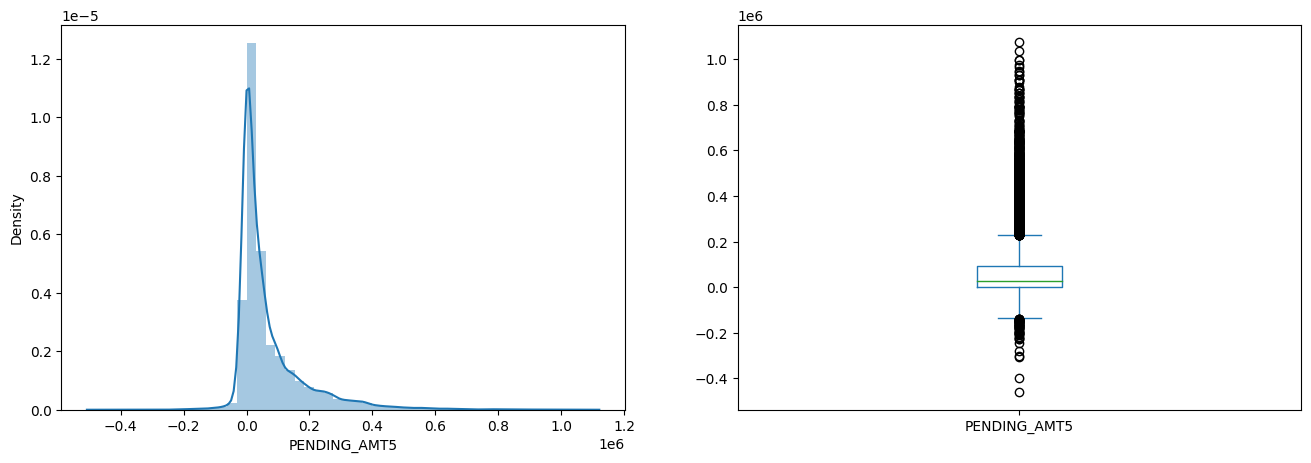

In [174]:
plt.figure(1)
plt.subplot(121)
sns.distplot(final_train_df['PENDING_AMT5']);
plt.subplot(122)
final_train_df['PENDING_AMT5'].plot.box(figsize=(16,5))
plt.show()

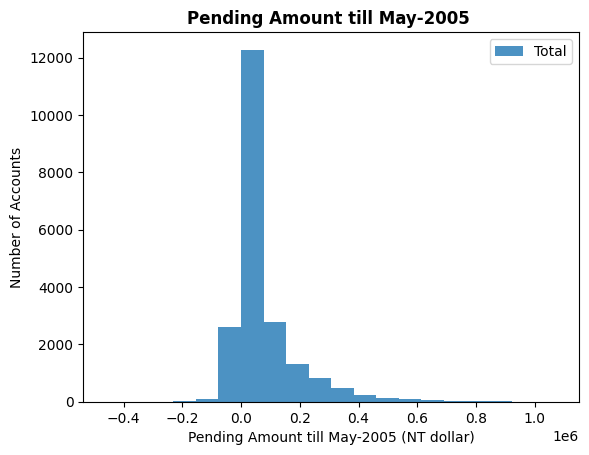

In [175]:
bins = 20
plt.hist(final_train_df.PENDING_AMT5, bins = bins, label = 'Total', alpha=0.8)

plt.xlabel('Pending Amount till May-2005 (NT dollar)');plt.ylabel('Number of Accounts')
plt.title('Pending Amount till May-2005 ',fontweight="bold", size=12)
plt.legend();
plt.show()

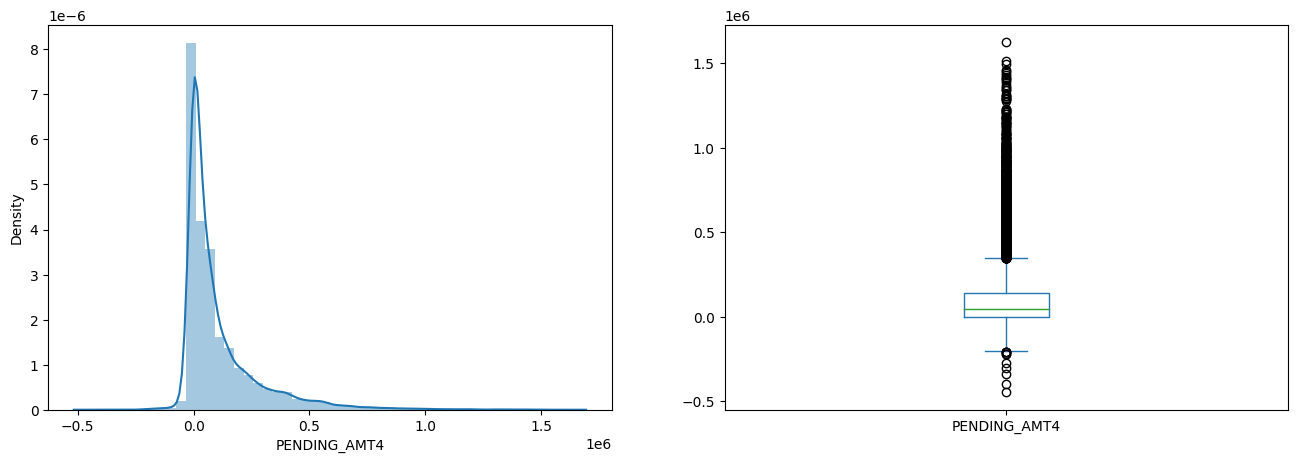

In [176]:
plt.figure(1)
plt.subplot(121)
sns.distplot(final_train_df['PENDING_AMT4']);
plt.subplot(122)
final_train_df['PENDING_AMT4'].plot.box(figsize=(16,5))
plt.show()

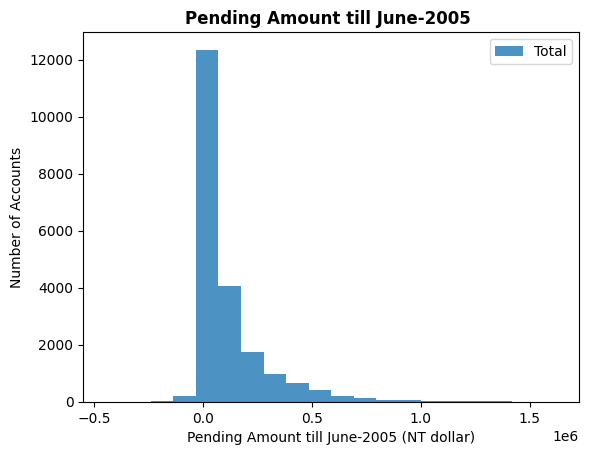

In [177]:
bins = 20
plt.hist(final_train_df.PENDING_AMT4, bins = bins, label = 'Total', alpha=0.8)

plt.xlabel('Pending Amount till June-2005 (NT dollar)');plt.ylabel('Number of Accounts')
plt.title('Pending Amount till June-2005 ',fontweight="bold", size=12)
plt.legend();
plt.show()

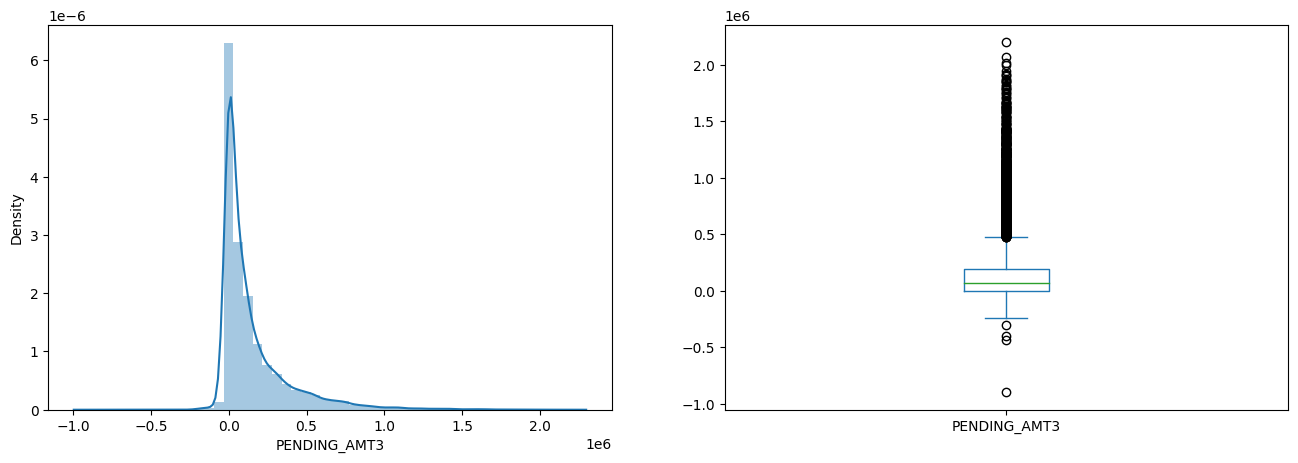

In [178]:
plt.figure(1)
plt.subplot(121)
sns.distplot(final_train_df['PENDING_AMT3']);
plt.subplot(122)
final_train_df['PENDING_AMT3'].plot.box(figsize=(16,5))
plt.show()

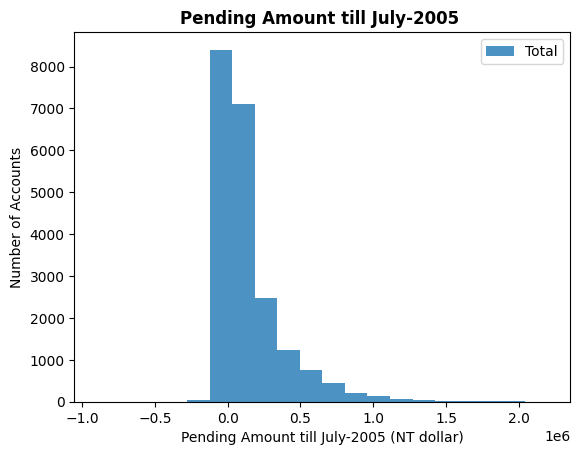

In [179]:
bins = 20
plt.hist(final_train_df.PENDING_AMT3, bins = bins, label = 'Total', alpha=0.8)

plt.xlabel('Pending Amount till July-2005 (NT dollar)');plt.ylabel('Number of Accounts')
plt.title('Pending Amount till July-2005 ',fontweight="bold", size=12)
plt.legend();
plt.show()

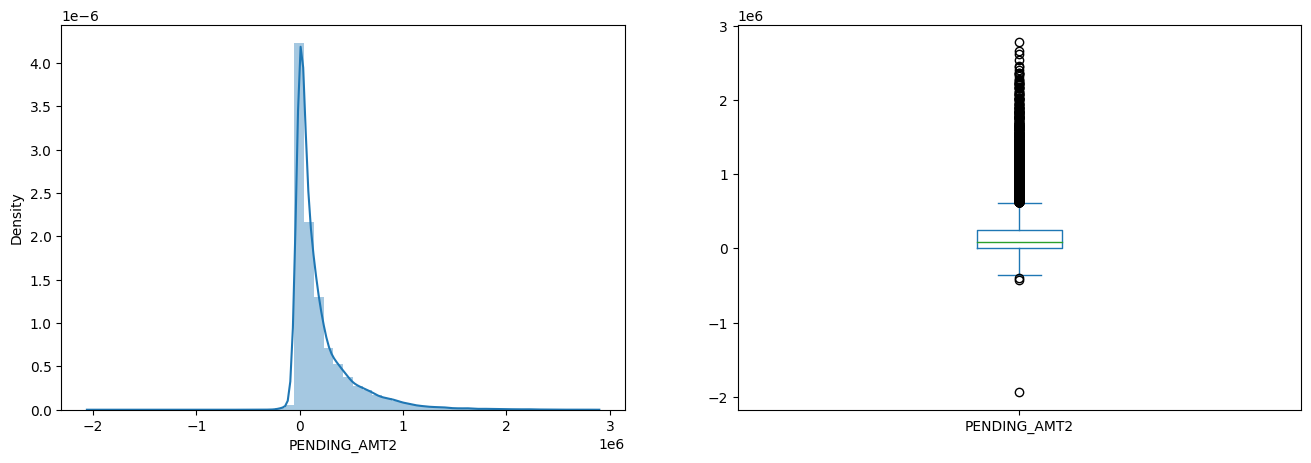

In [180]:
plt.figure(1)
plt.subplot(121)
sns.distplot(final_train_df['PENDING_AMT2']);
plt.subplot(122)
final_train_df['PENDING_AMT2'].plot.box(figsize=(16,5))
plt.show()

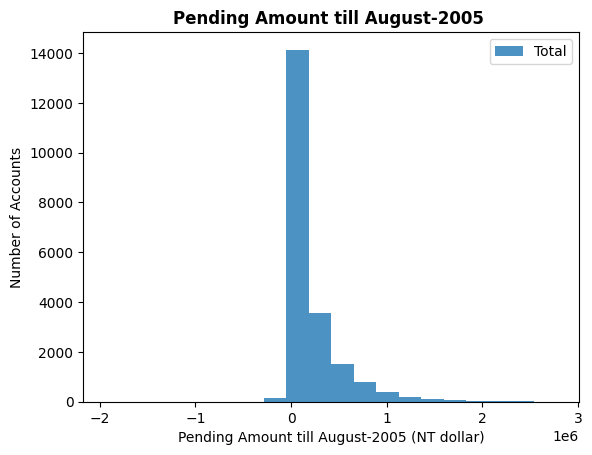

In [181]:
bins = 20
plt.hist(final_train_df.PENDING_AMT2, bins = bins, label = 'Total', alpha=0.8)

plt.xlabel('Pending Amount till August-2005 (NT dollar)');plt.ylabel('Number of Accounts')
plt.title('Pending Amount till August-2005 ',fontweight="bold", size=12)
plt.legend();
plt.show()

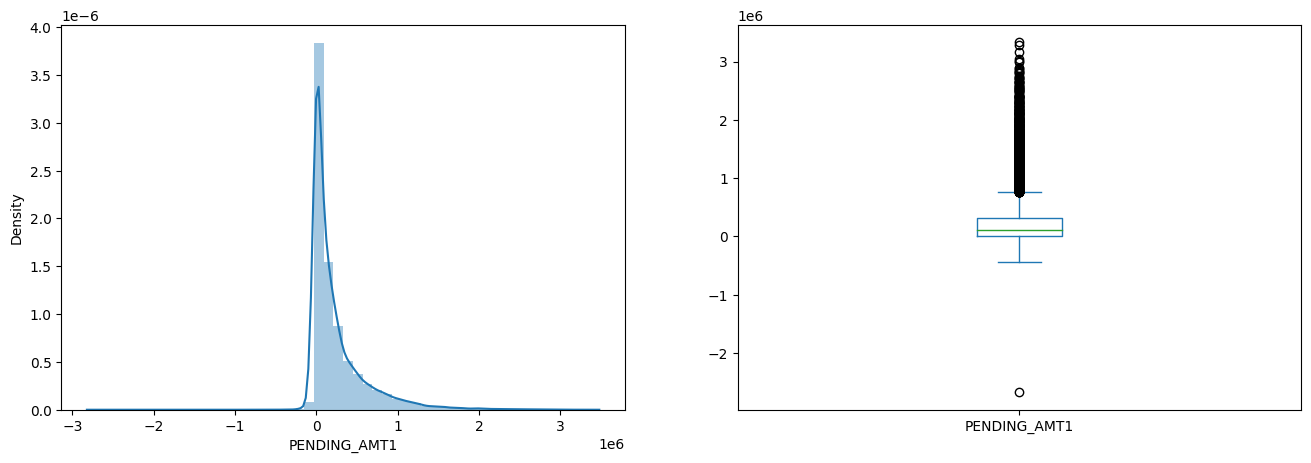

In [182]:
plt.figure(1)
plt.subplot(121)
sns.distplot(final_train_df['PENDING_AMT1']);
plt.subplot(122)
final_train_df['PENDING_AMT1'].plot.box(figsize=(16,5))
plt.show()

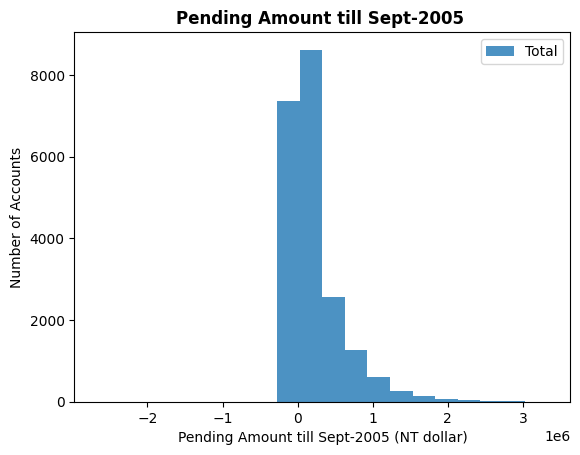

In [183]:
bins = 20
plt.hist(final_train_df.PENDING_AMT1, bins = bins, label = 'Total', alpha=0.8)

plt.xlabel('Pending Amount till Sept-2005 (NT dollar)');plt.ylabel('Number of Accounts')
plt.title('Pending Amount till Sept-2005 ',fontweight="bold", size=12)
plt.legend();
plt.show()

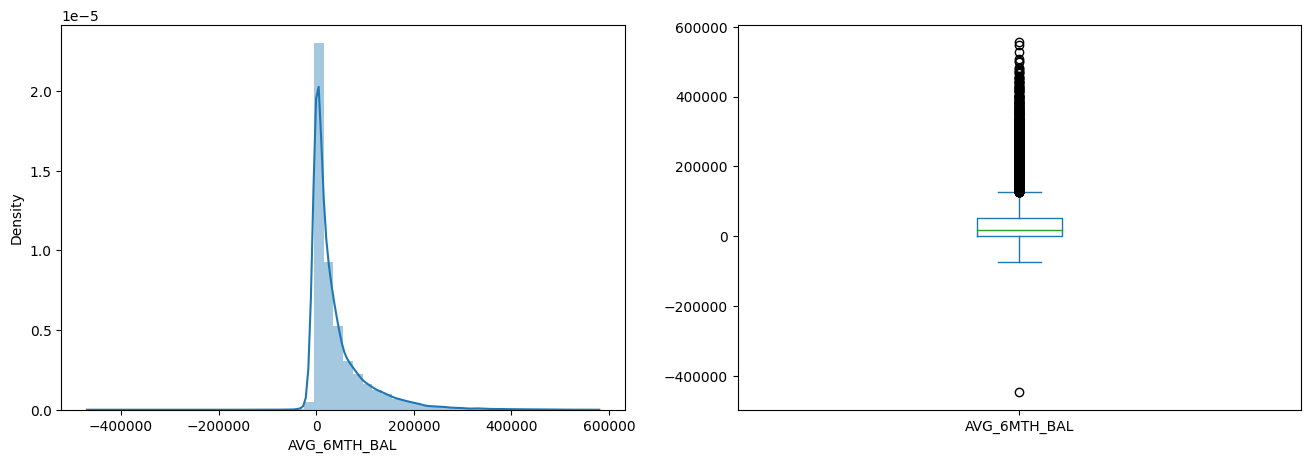

In [184]:
plt.figure(1)
plt.subplot(121)
sns.distplot(final_train_df['AVG_6MTH_BAL']);
plt.subplot(122)
final_train_df['AVG_6MTH_BAL'].plot.box(figsize=(16,5))
plt.show()

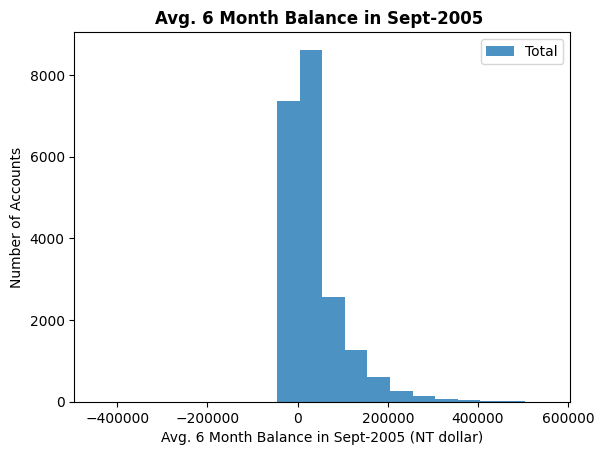

In [185]:
bins = 20
plt.hist(final_train_df.AVG_6MTH_BAL, bins = bins, label = 'Total', alpha=0.8)

plt.xlabel('Avg. 6 Month Balance in Sept-2005 (NT dollar)');plt.ylabel('Number of Accounts')
plt.title('Avg. 6 Month Balance in Sept-2005 ',fontweight="bold", size=12)
plt.legend();
plt.show()

Now we shall focus on analysing the impact of no payments and delayed payments on the financial health of this company.

Let us start with understanding the Total Credit given to the customers vs. Total Pending Amount from the customers as on Sept-2005.


In [186]:
print("\nTotal Credit given to all the customers (as on Sept-2005): ", final_train_df['LIMIT_BAL'].sum())


Total Credit given to all the customers (as on Sept-2005):  3511509680


In [187]:
print("\nTotal Credit given to all Defaulting customers (as on Sept-2005): ", final_train_df.groupby('default_payment_next_month')['LIMIT_BAL'].sum()[1])


Total Credit given to all Defaulting customers (as on Sept-2005):  597807680


In [188]:
print("\nTotal Pending Amount from all the customers (as on Sept-2005): ", final_train_df['PENDING_AMT1'].sum())


Total Pending Amount from all the customers (as on Sept-2005):  5025323951


In [189]:
print("\nTotal Pending Amount from all Defaulting customers (as on Sept-2005): ", final_train_df.groupby('default_payment_next_month')['PENDING_AMT1'].sum()[1])


Total Pending Amount from all Defaulting customers (as on Sept-2005):  1097370521


As we can see, the company gave a credit of 3.5 billion NT dollars, whereas the total amount pending is 5 billion NT dollars.

Out of this, the company gave a credit of 600 million NT dollars to defaulting customers, whereas total amount pending from defaulting customers is 1.1 billion NT dollars.


**We can clearly establish that certain basic "Credit Controls" have not been observed by the company. They have obviously allowed customers to continue to use cards beyond the authorized credit.**


**The reason is very simple - the entire focus has been on customers who shall not pay next month, rather than on customers who are paying less than the "Minimum Amounts" and falling into "Delinquent" status.**


Let us analyze pending amounts according to the "DELINQ_1" counts.

Let us understand the distribution of Total Credit and Total Pending Amount based on No of delinquencies over 6-month period.



In [190]:
delinquencies = list(final_train_df['DELINQ_1'].unique())

In [191]:
for num_delinq in delinquencies:

    print("\nTotal Credit Amount for : ", num_delinq, " delinquencies is : ", sum(final_train_df[final_train_df['DELINQ_1']==num_delinq]['LIMIT_BAL']))

    print("\nTotal Pending Amount for : ", num_delinq, " delinquencies is : ", sum(final_train_df[final_train_df['DELINQ_1']==num_delinq]['PENDING_AMT1']))



Total Credit Amount for :  0  delinquencies is :  1493990000

Total Pending Amount for :  0  delinquencies is :  110831669

Total Credit Amount for :  5  delinquencies is :  856857680

Total Pending Amount for :  5  delinquencies is :  2865132706

Total Credit Amount for :  1  delinquencies is :  303090000

Total Pending Amount for :  1  delinquencies is :  146964371

Total Credit Amount for :  4  delinquencies is :  411770000

Total Pending Amount for :  4  delinquencies is :  1144353258

Total Credit Amount for :  3  delinquencies is :  236542000

Total Pending Amount for :  3  delinquencies is :  502284688

Total Credit Amount for :  2  delinquencies is :  209260000

Total Pending Amount for :  2  delinquencies is :  255757259


From the above, we get the following insights :

1. About 1.5 billion dollars credit has been allocated to customers who have never been delinquent.

2. Only about 111 million dollars is pending from such non-delinquent customers.

3. About 303 million dollars credit has been allocated to customers who have been delinquent for 1 months

4. About 146 million dollars is pending from such customers who have been delinquent for 1 month.

5. About 209 million dollars credit has been allocated to customers who have been delinquent for 2 months

6. About 255 million dollars is pending from such customers who have been delinquent for 2 months.

7. About 236 million dollars credit has been allocated to customers who have been delinquent for 3 months

8. About 502 million dollars is pending from such customers who have been delinquent for 3 months.

9. About 411 million dollars credit has been allocated to customers who have been delinquent for 4 months

10. About 1.15 billion dollars is pending from such customers who have been delinquent for 4 months.

11. About 856 million dollars credit has been allocated to customers who have been delinquent for 5 months

12. About 2.9 billion dollars is pending from such customers who have been delinquent for 5 months.

**We can clearly see that pending amount keeps increasing by an order of magnitude as the customers keep getting delinquent month after month.**

Now let us understand the Total Pending amount that is stuck by "No Payment" customers.


In [192]:
nopayments = list(final_train_df['NO_PMNT1'].unique())

In [193]:
for num_pmnt in nopayments:

    print("\nTotal Credit Amount for : ", num_pmnt, " no payments is : ", sum(final_train_df[final_train_df['NO_PMNT1']==num_pmnt]['LIMIT_BAL']))

    print("\nTotal Pending Amount for : ", num_pmnt, " no payments is : ", sum(final_train_df[final_train_df['NO_PMNT1']==num_pmnt]['PENDING_AMT1']))



Total Credit Amount for :  0  no payments is :  2111667680

Total Pending Amount for :  0  no payments is :  3822901549

Total Credit Amount for :  3  no payments is :  186080000

Total Pending Amount for :  3  no payments is :  79081940

Total Credit Amount for :  5  no payments is :  205410000

Total Pending Amount for :  5  no payments is :  18295754

Total Credit Amount for :  4  no payments is :  132190000

Total Pending Amount for :  4  no payments is :  21127091

Total Credit Amount for :  1  no payments is :  577502000

Total Pending Amount for :  1  no payments is :  817426726

Total Credit Amount for :  2  no payments is :  298660000

Total Pending Amount for :  2  no payments is :  266490891


From the above, we get the following insights :

1. About 2.1 billion dollars credit has been allocated to customers who have never defaulted on payments - even if they may have paid token amounts.

2. About 3.8 billion dollars is pending from such non-defaulting customers. This is the most surprising finding from the data. This is a proof that the company is focussed on the wrong metric.

3. About 577 million dollars credit has been allocated to customers who have defaulted on payments just once.

4. About 817 million dollars is pending from customers who have defaulted just once.

5. About 299 million dollars credit has been allocated to customers who have defaulted on payments 2 times.

6. About 266 million dollars is pending from customers who have defaulted two times.

7. About 186 million dollars credit has been allocated to customers who have defaulted on payments 3 times.

8. About 79 million dollars is pending from customers who have defaulted 3 times.

9. About 132 million dollars credit has been allocated to customers who have defaulted on payments 4 times.

10. About 21 million dollars is pending from customers who have defaulted 4 times.

11. About 205 million dollars credit has been allocated to customers who have defaulted on payments 5 times.

12. About 18 million dollars is pending from customers who have defaulted 5 times.

**We can clearly see that pending amount keeps decreasing by an order of magnitude as the customers keep defaulting month after month. This is also because there is a regular decrease in the number of customers who are defaulting multiple times.**

**This behavior seems to be exactly opposite of the customers who are delinquent month after month. This is because there is a regular increase in the number of customers who are becoming delinquent.**

**It is obvious that the focus of this company needs to change towards customers becoming delinquent.**

Finally, let us understand the Total Pending amount with respect to Credit Utilization Ratios.

We know that Credit utilization ratio of <= 0.3 is considered good in the industry.

Let us understand how many of the customers fall in this safe category.

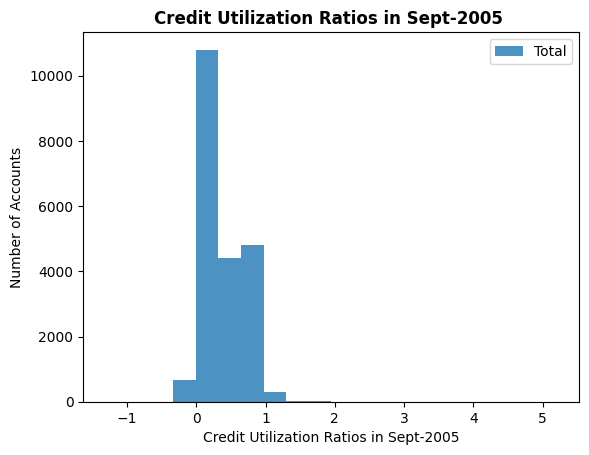

In [194]:
bins = 20
plt.hist(final_train_df.CREDIT_UTIL_RATIO, bins = bins, label = 'Total', alpha=0.8)

plt.xlabel('Credit Utilization Ratios in Sept-2005');plt.ylabel('Number of Accounts')
plt.title('Credit Utilization Ratios in Sept-2005 ',fontweight="bold", size=12)
plt.legend();
plt.show()

In [195]:
len(final_train_df[final_train_df['CREDIT_UTIL_RATIO'] <= 0.3])

11235

In [196]:
len(final_train_df[(final_train_df['CREDIT_UTIL_RATIO'] > 0.3) & (final_train_df['CREDIT_UTIL_RATIO'] <= 0.7)])

5505

In [197]:
len(final_train_df[(final_train_df['CREDIT_UTIL_RATIO'] > 0.7) & (final_train_df['CREDIT_UTIL_RATIO'] <= 1)])

4062

In [198]:
len(final_train_df[final_train_df['CREDIT_UTIL_RATIO'] > 1])

198

We see that almost 50% of the customers have a credit utilization ratio of less than 30% which is good.

However, more than 20% customers have credit utilization ratios of more than 70%.

This again points to the fact that company should be focusing on the delinquent customers more than the once who miss the payments altogether.

In [199]:
corr = final_train_df.corr()

In [200]:
corr['default_payment_next_month']

PAY_2                         0.263546
NO_PMNT5                      0.093914
BILL_AMT5                    -0.015790
MARRIAGE                     -0.016888
PAY_AMT5                     -0.063666
PENDING_AMT6                  0.002798
DELINQ_5                      0.024624
DELINQ_4                      0.021941
PENDING_AMT3                 -0.002656
NO_PMNT4                      0.124537
NO_PMNT2                      0.151516
PAY_5                         0.208783
BILL_AMT1                    -0.028493
PENDING_AMT1                 -0.004494
PAY_1                         0.325851
MIN_AMT5                      0.002798
DELINQ_2                      0.022488
PAY_6                         0.188985
PAY_AMT6                     -0.061206
MIN_AMT3                     -0.001083
BILL_AMT3                    -0.022824
PAY_AMT1                     -0.076042
PAY_AMT2                     -0.059409
PAY_4                         0.220079
DELINQ_3                      0.023261
BILL_AMT2                

We see that only a handful of features are showing +ve correlation with our target variable.

We will only select these features for predictive modeling.

In [201]:
corr['default_payment_next_month']>= 0.1

PAY_2                          True
NO_PMNT5                      False
BILL_AMT5                     False
MARRIAGE                      False
PAY_AMT5                      False
PENDING_AMT6                  False
DELINQ_5                      False
DELINQ_4                      False
PENDING_AMT3                  False
NO_PMNT4                       True
NO_PMNT2                       True
PAY_5                          True
BILL_AMT1                     False
PENDING_AMT1                  False
PAY_1                          True
MIN_AMT5                      False
DELINQ_2                      False
PAY_6                          True
PAY_AMT6                      False
MIN_AMT3                      False
BILL_AMT3                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_4                          True
DELINQ_3                      False
BILL_AMT2                     False
BILL_AMT4                     False
MIN_AMT1                    

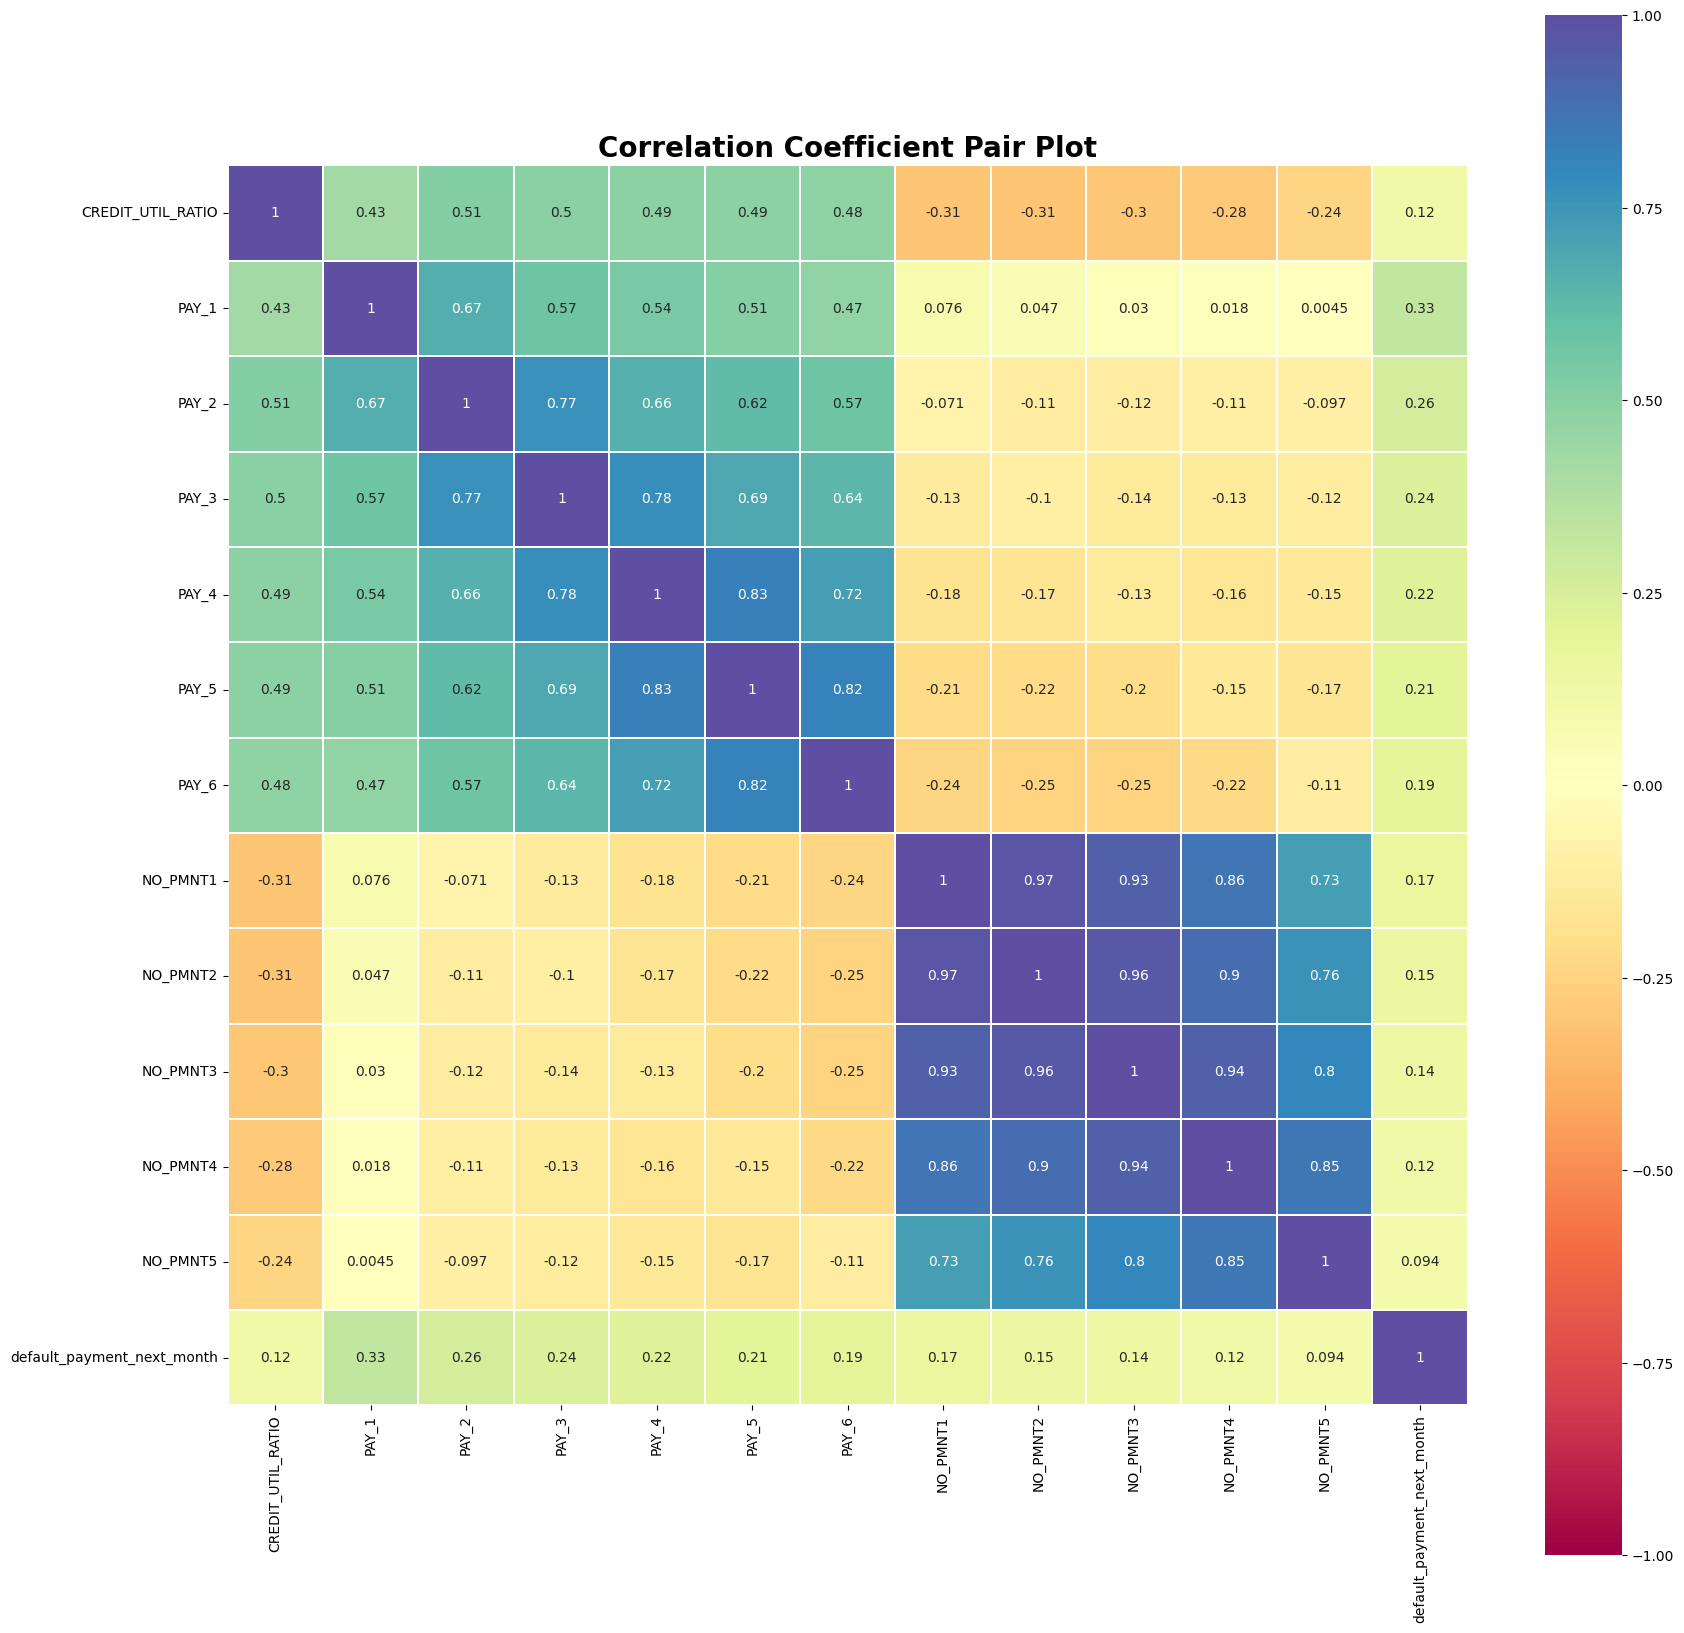

In [202]:
# Making correlation coefficients pair plot of the selected features

selected_columns = ['CREDIT_UTIL_RATIO','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','NO_PMNT1','NO_PMNT2','NO_PMNT3','NO_PMNT4','NO_PMNT5','default_payment_next_month']
plt.figure(figsize=(20,20))
ax = plt.axes()
corr_selected = final_train_df[selected_columns].corr()
sns.heatmap(corr_selected, vmax=1,vmin=-1, square=True, annot=True, cmap='Spectral',linecolor="white", linewidths=0.01, ax=ax)
ax.set_title('Correlation Coefficient Pair Plot',fontweight="bold", size=20)
plt.show()

**Let us create training set X and target set y.**



In [203]:
train_columns = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

In [204]:
target_column = ['default_payment_next_month']

In [205]:
X = final_train_df[train_columns]

In [206]:
X.shape

(21000, 6)

In [207]:
y = final_train_df['default_payment_next_month']

In [208]:
y.shape

(21000,)

I will use the train_test_split function from sklearn to divide our train dataset.



In [209]:
from sklearn.model_selection import train_test_split

In [210]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=2020)


# Building and Evaluating Predictive Models


As this is a `classification` problem, I will be using the following algorithms:


* Logistic regression
* Decision tree
* Random forest
* Support Vector Classifications
* Stocastic Gradient Descend
* Adaboost
* XGBoost
* Neural Network Models


Considering a well known fact that out of all the above, Random Forest, Stocastic Gradient Descend, AdaBoost and XGBoost are the best suited algorithms for the problem at hand, I  will only focus on these algorithms.


We shall be using stratified k-folds cross validation, and "class_weight balancing" capability of the algorithms for estimating model parameters.


We shart with the Random Forest predictive model.



#                         Random Forest


Let’s import stratified KFold from sklearn and fit the model.



In [211]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, f1_score

from statistics import mean


In [212]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=2020,shuffle=True)

score_rf = []

X_train = np.array(X_train)

for train_index,test_index in kf.split(X_train,y_train):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X_train[train_index],X_train[test_index]
    ytr,yvl = y_train.iloc[train_index],y_train.iloc[test_index]
    model_rf = RandomForestClassifier(class_weight='balanced',random_state=2020)
    model_rf.fit(xtr, ytr)
    pred_test_rf = model_rf.predict(xvl)
    score_rf.append(accuracy_score(yvl,pred_test_rf))
    print('\nAccuracy_score : ',score_rf[i-1])
    i+=1

print("\nThe mean validation accuracy of Random Forest model is : ", mean(score_rf))



1 of kfold 5

Accuracy_score :  0.7741071428571429

2 of kfold 5

Accuracy_score :  0.7660714285714286

3 of kfold 5

Accuracy_score :  0.7648809523809523

4 of kfold 5

Accuracy_score :  0.763095238095238

5 of kfold 5

Accuracy_score :  0.7886904761904762

The mean validation accuracy of Random Forest model is :  0.7713690476190476


In [213]:
# Output confusion matrix

pred_rf = model_rf.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, pred_rf))
print()
print("Classification Report")
print(classification_report(y_val, pred_rf))


Confusion Matrix:
[[2723  537]
 [ 426  514]]

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3260
           1       0.49      0.55      0.52       940

    accuracy                           0.77      4200
   macro avg       0.68      0.69      0.68      4200
weighted avg       0.78      0.77      0.78      4200



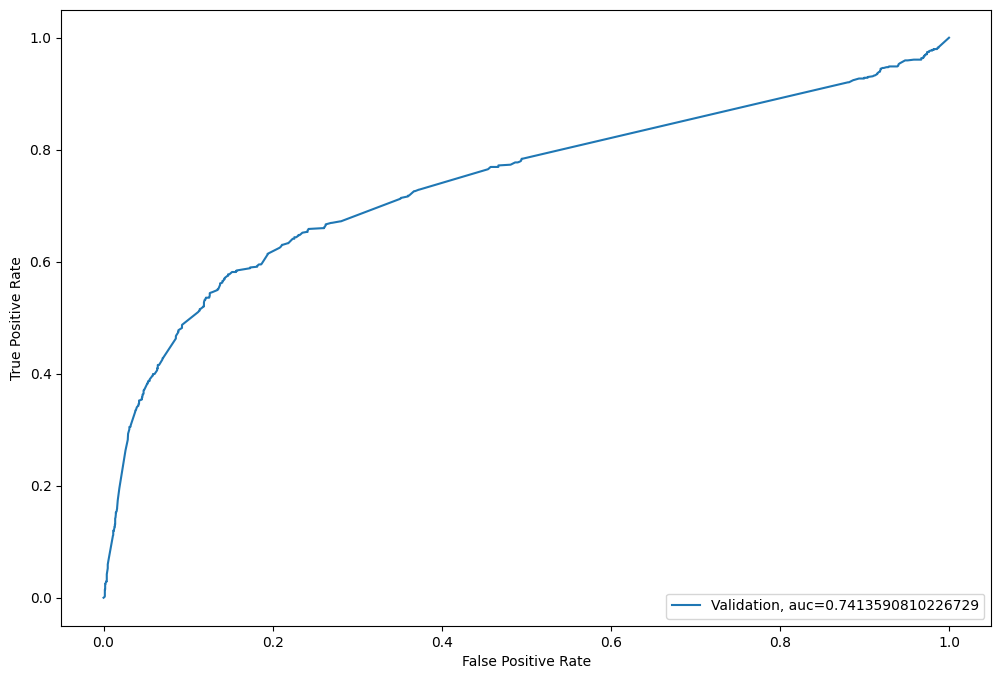

In [214]:
# Visualize the ROC curve

pred_rf_prob=model_rf.predict_proba(xvl)[:,1]

fpr, tpr, _ = metrics.roc_curve(yvl,  pred_rf_prob)
auc = metrics.roc_auc_score(yvl, pred_rf_prob)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


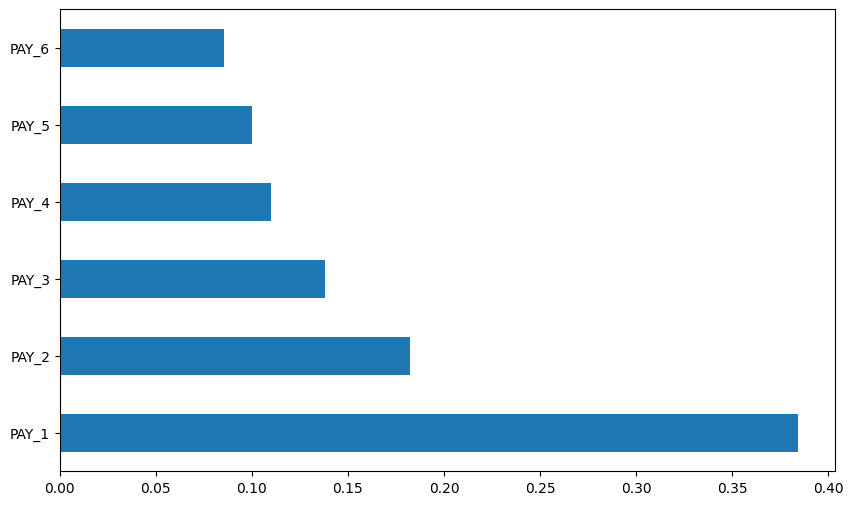

In [215]:
importances=pd.Series(model_rf.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(10,6));


We can see that PAY_1 seems to be the most important feature.

Then it is followed by PAY_2, PAY_3 etc..


##                     Gradient Boosting



In [216]:
i=1

score_gb = []

for train_index,test_index in kf.split(X_train,y_train):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X_train[train_index],X_train[test_index]
    ytr,yvl = y_train.iloc[train_index],y_train.iloc[test_index]

    model_gb = GradientBoostingClassifier(random_state=2020)

    model_gb.fit(xtr, ytr)
    pred_test_gb = model_gb.predict(xvl)
    score_gb.append(accuracy_score(yvl,pred_test_gb))
    print('\nAccuracy_score : ',score_gb[i-1])
    i+=1

print("\nThe mean validation accuracy of the Gradient Boosting model is : ", mean(score_gb))



1 of kfold 5

Accuracy_score :  0.819047619047619

2 of kfold 5

Accuracy_score :  0.8199404761904762

3 of kfold 5

Accuracy_score :  0.8181547619047619

4 of kfold 5

Accuracy_score :  0.8196428571428571

5 of kfold 5

Accuracy_score :  0.83125

The mean validation accuracy of the Gradient Boosting model is :  0.8216071428571429


In [217]:
# Output confusion matrix and classification report of Gradient Boosting algorithm on validation set

pred_gb = model_gb.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, pred_gb))
print()
print("Classification Report")
print(classification_report(y_val, pred_gb))

Confusion Matrix:
[[3072  188]
 [ 579  361]]

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3260
           1       0.66      0.38      0.48       940

    accuracy                           0.82      4200
   macro avg       0.75      0.66      0.69      4200
weighted avg       0.80      0.82      0.80      4200



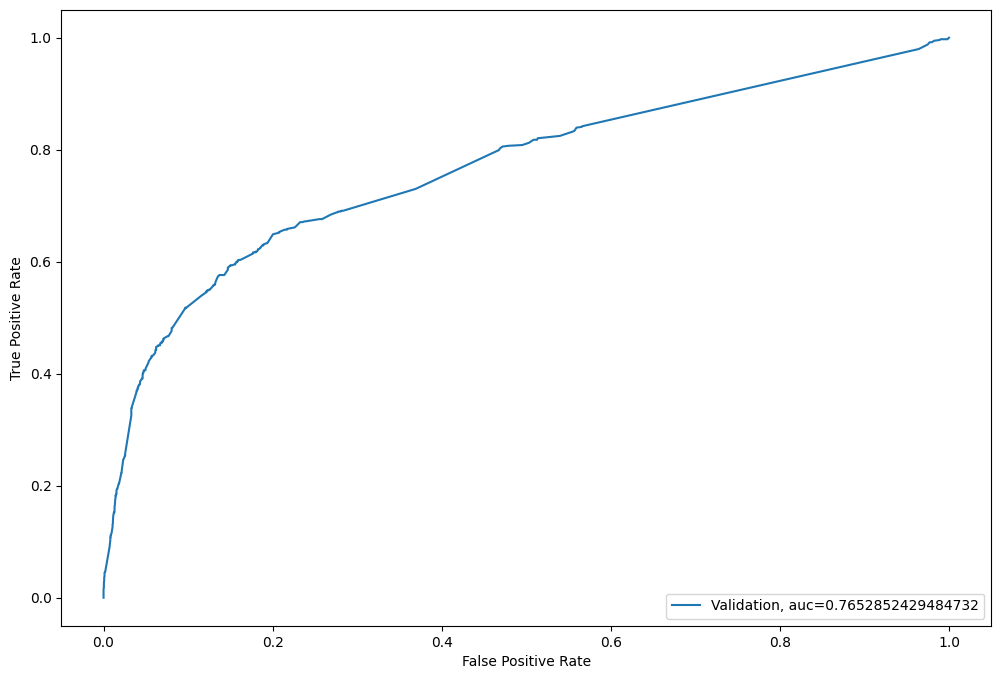

In [218]:
# Visualize the ROC curve

pred_gb_prob=model_gb.predict_proba(xvl)[:,1]

fpr, tpr, _ = metrics.roc_curve(yvl,  pred_gb_prob)
auc = metrics.roc_auc_score(yvl, pred_gb_prob)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


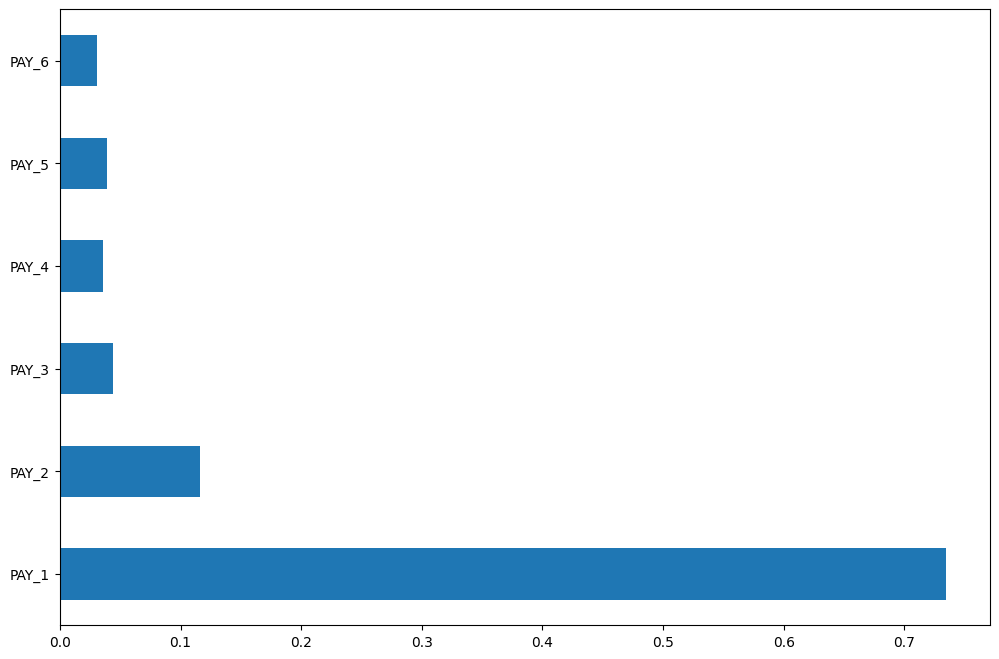

In [219]:
importances=pd.Series(model_gb.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8));


##                      AdaBoost



In [220]:
i=1

score_adb = []

for train_index,test_index in kf.split(X_train,y_train):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X_train[train_index],X_train[test_index]
    ytr,yvl = y_train.iloc[train_index],y_train.iloc[test_index]
    model_adb = AdaBoostClassifier(random_state=2020)
    model_adb.fit(xtr, ytr)
    pred_test_adb = model_adb.predict(xvl)
    score_adb.append(accuracy_score(yvl,pred_test_adb))
    print('\nAccuracy_score : ',score_adb[i-1])
    i+=1

print("\nThe mean validation accuracy of the Ada Boosting model is : ", mean(score_adb))



1 of kfold 5

Accuracy_score :  0.8163690476190476

2 of kfold 5

Accuracy_score :  0.812202380952381

3 of kfold 5

Accuracy_score :  0.8166666666666667

4 of kfold 5

Accuracy_score :  0.8202380952380952

5 of kfold 5

Accuracy_score :  0.8208333333333333

The mean validation accuracy of the Ada Boosting model is :  0.8172619047619047


In [221]:
# Output confusion matrix and classification report of Ada Boosting algorithm on validation set

pred_adb = model_adb.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, pred_adb))
print()
print("Classification Report")
print(classification_report(y_val, pred_adb))

Confusion Matrix:
[[3107  153]
 [ 653  287]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3260
           1       0.65      0.31      0.42       940

    accuracy                           0.81      4200
   macro avg       0.74      0.63      0.65      4200
weighted avg       0.79      0.81      0.78      4200



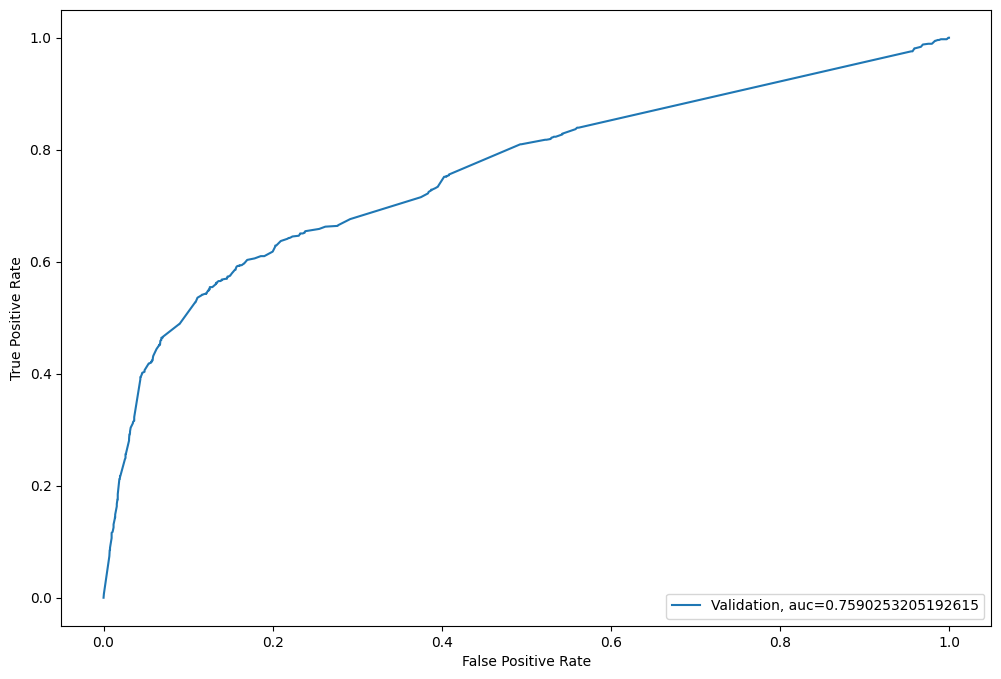

In [222]:
# Visualize the ROC curve

pred_adb_prob=model_adb.predict_proba(xvl)[:,1]

fpr, tpr, _ = metrics.roc_curve(yvl,  pred_adb_prob)
auc = metrics.roc_auc_score(yvl, pred_adb_prob)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


<Axes: >

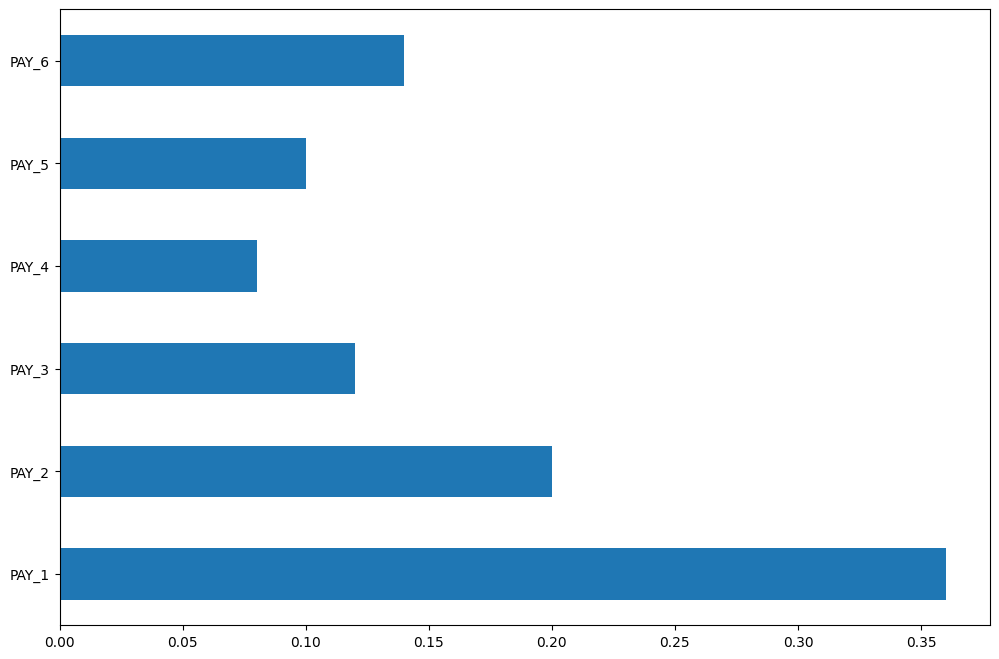

In [223]:
importances=pd.Series(model_adb.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))


#                                            XGBOOST




In [224]:
i=1

score_xgb = []

for train_index,test_index in kf.split(X_train,y_train):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X_train[train_index],X_train[test_index]
    ytr,yvl = y_train.iloc[train_index],y_train.iloc[test_index]

    model_xgb = xgb.sklearn.XGBClassifier(objective="binary:logistic", random_state=2020)
    model_xgb.fit(xtr, ytr)
    pred_test_xgb = model_xgb.predict(xvl)
    score_xgb.append(accuracy_score(yvl,pred_test_xgb))
    print('\nAccuracy_score : ',score_xgb[i-1])
    i+=1

print("\nThe mean validation accuracy of the XGBoost model is : ", mean(score_xgb))



1 of kfold 5

Accuracy_score :  0.8154761904761905

2 of kfold 5

Accuracy_score :  0.8178571428571428

3 of kfold 5

Accuracy_score :  0.8160714285714286

4 of kfold 5

Accuracy_score :  0.8205357142857143

5 of kfold 5

Accuracy_score :  0.8258928571428571

The mean validation accuracy of the XGBoost model is :  0.8191666666666666


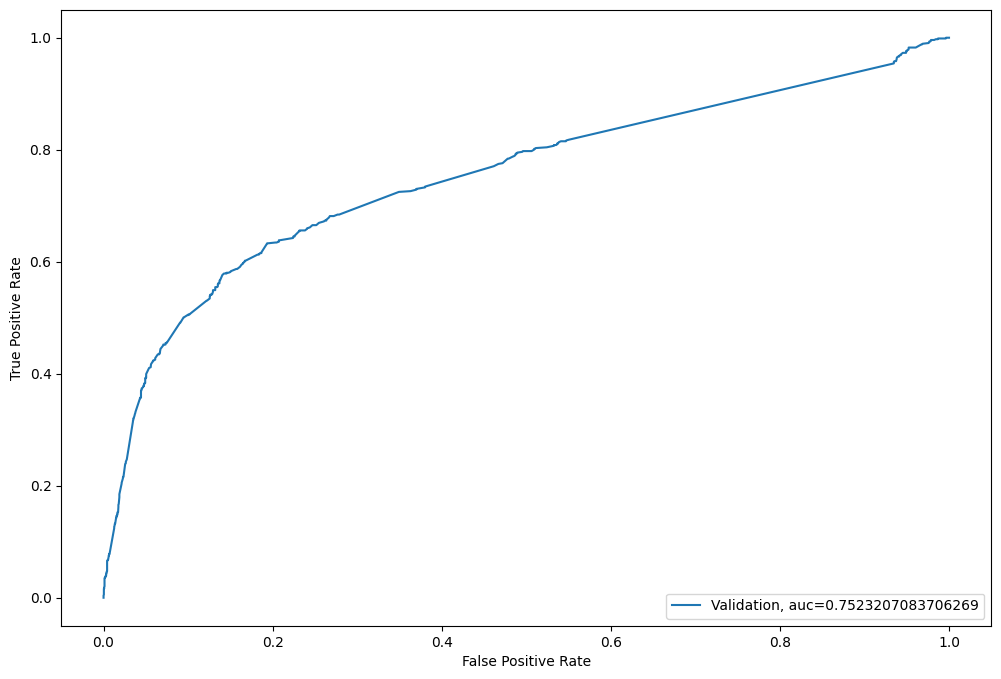

In [225]:
# Visualize the ROC curve

pred_xgb_prob=model_xgb.predict_proba(xvl)[:,1]

fpr, tpr, _ = metrics.roc_curve(yvl,  pred_xgb_prob)
auc = metrics.roc_auc_score(yvl, pred_xgb_prob)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


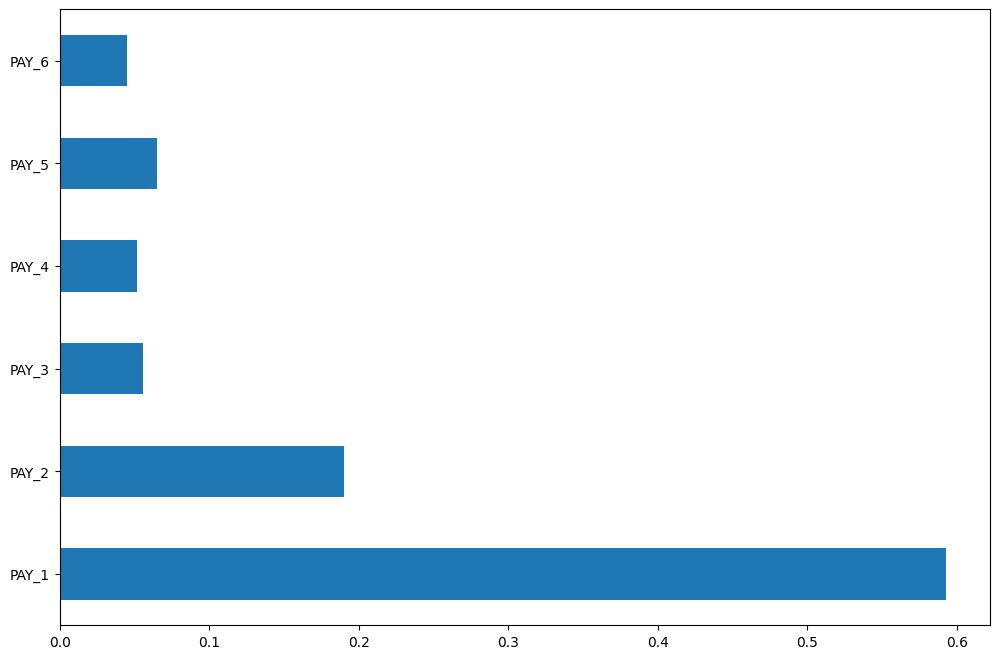

In [226]:
importances=pd.Series(model_xgb.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8));


Out of the 4 algorithms, we find that GradientBoosting and XGBoosting algorithms have performed the BEST.

As our performance metric for submission is AUC, we find that Gradient Boosting has given us the best AUC.

We can now explaore if we can improve this AUC by parameter tuning.



In [227]:
from sklearn.model_selection import GridSearchCV

In [228]:
# Provide range for max_depth from 2 to 20 with an interval of 2
# and from 40 to 200 with an interval of 20 for n_estimators

paramgrid_gb = {'learning_rate':[0.05, 0.1, 0.15], 'max_depth': list(range(3, 21, 3)), 'n_estimators': list(range(60, 160, 20))}

grid_search_gb=GridSearchCV(GradientBoostingClassifier(max_features='auto',random_state=2020),paramgrid_gb)


In [229]:
# Fit the grid search model

grid_search_gb.fit(X_train,y_train)


GridSearchCV(estimator=GradientBoostingClassifier(max_features='auto',
                                                  random_state=2020),
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [3, 6, 9, 12, 15, 18],
                         'n_estimators': [60, 80, 100, 120, 140]})

In [230]:
# Estimating the optimized value

grid_search_gb.best_estimator_



GradientBoostingClassifier(learning_rate=0.15, max_features='auto',
                           n_estimators=80, random_state=2020)

Now we will use these best parameters to run the model again and see what is the best result that we can get from this.

In [231]:
i=1
# kf = KFold(n_splits=5,random_state=2020,shuffle=True)

score_gb = []

for train_index,test_index in kf.split(X_train,y_train):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X_train[train_index],X_train[test_index]
    ytr,yvl = y_train.iloc[train_index],y_train.iloc[test_index]
    # model_gb = GradientBoostingClassifier(learning_rate=0.1, max_features='sqrt', max_depth=18, n_estimators=120, random_state=2020)

    model_gb = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                                      learning_rate=0.15, loss='deviance', max_depth=3,
                                      max_features='auto', max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0, n_estimators=80,
                                      n_iter_no_change=None, random_state=2020, subsample=1.0,
                                      tol=0.0001, validation_fraction=0.1, verbose=0,
                                      warm_start=False)


    model_gb.fit(xtr, ytr)
    pred_test_gb = model_gb.predict(xvl)
    score_gb.append(accuracy_score(yvl,pred_test_gb))
    print('\nAccuracy_score : ',score_gb[i-1])
    i+=1

print("\nThe mean validation accuracy of the Gradient Boosting model is : ", mean(score_gb))



1 of kfold 5

Accuracy_score :  0.819047619047619

2 of kfold 5

Accuracy_score :  0.8193452380952381

3 of kfold 5

Accuracy_score :  0.8193452380952381

4 of kfold 5

Accuracy_score :  0.8205357142857143

5 of kfold 5

Accuracy_score :  0.8315476190476191

The mean validation accuracy of the Gradient Boosting model is :  0.8219642857142857


In [232]:
# Output confusion matrix and classification report of Gradient Boosting algorithm on validation set

pred_gb = model_gb.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, pred_gb))
print()
print("Classification Report")
print(classification_report(y_val, pred_gb))

Confusion Matrix:
[[3074  186]
 [ 577  363]]

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3260
           1       0.66      0.39      0.49       940

    accuracy                           0.82      4200
   macro avg       0.75      0.66      0.69      4200
weighted avg       0.80      0.82      0.80      4200



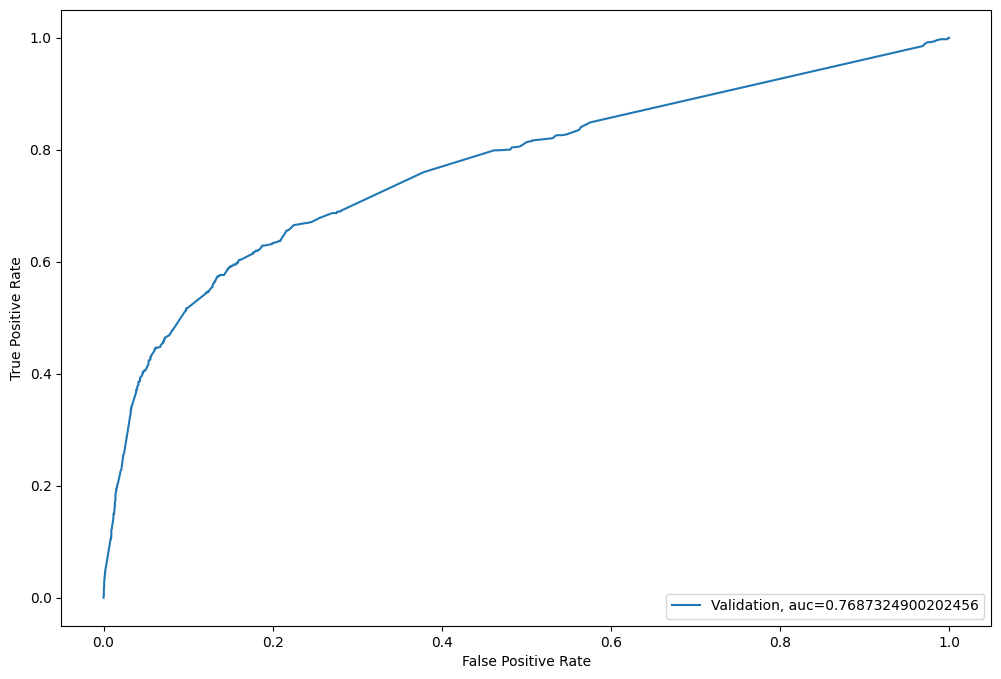

In [233]:
# Visualize the ROC curve

pred_gb_prob=model_gb.predict_proba(xvl)[:,1]

fpr, tpr, _ = metrics.roc_curve(yvl,  pred_gb_prob)
auc = metrics.roc_auc_score(yvl, pred_gb_prob)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


After tuning of the GradientBoosting model, we see an improvement in AUC from 0.7652 to 0.7687, and accuracy from 0.8216 to 0.8219.



We will now prepare the data for `submission`

We will predict on the provided test dataset using the GradientBoosting model, and use these predictions to populate the submission.csv file.



In [234]:
final_test_df.shape

(9000, 47)

In [235]:
final_train_df.shape

(21000, 48)

In [236]:
final_test_df.columns

Index(['PAY_2', 'NO_PMNT5', 'BILL_AMT5', 'MARRIAGE', 'PAY_AMT5',
       'PENDING_AMT6', 'DELINQ_5', 'DELINQ_4', 'PENDING_AMT3', 'NO_PMNT4',
       'AGE_BIN', 'NO_PMNT2', 'PAY_5', 'BILL_AMT1', 'PENDING_AMT1', 'PAY_1',
       'MIN_AMT5', 'DELINQ_2', 'PAY_6', 'PAY_AMT6', 'MIN_AMT3', 'BILL_AMT3',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_4', 'DELINQ_3', 'BILL_AMT2', 'BILL_AMT4',
       'MIN_AMT1', 'LIMIT_BAL', 'EDUCATION', 'PAY_AMT3', 'MIN_AMT2',
       'MIN_AMT6', 'PENDING_AMT2', 'PENDING_AMT5', 'PAY_3', 'NO_PMNT1',
       'CREDIT_UTIL_RATIO', 'DELINQ_1', 'SEX', 'PAY_AMT4', 'BILL_AMT6',
       'NO_PMNT3', 'MIN_AMT4', 'AVG_6MTH_BAL', 'PENDING_AMT4'],
      dtype='object')

In [237]:
final_train_df.columns

Index(['PAY_2', 'NO_PMNT5', 'BILL_AMT5', 'MARRIAGE', 'PAY_AMT5',
       'PENDING_AMT6', 'DELINQ_5', 'DELINQ_4', 'PENDING_AMT3', 'NO_PMNT4',
       'AGE_BIN', 'NO_PMNT2', 'PAY_5', 'BILL_AMT1', 'PENDING_AMT1', 'PAY_1',
       'MIN_AMT5', 'DELINQ_2', 'PAY_6', 'PAY_AMT6', 'MIN_AMT3', 'BILL_AMT3',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_4', 'DELINQ_3', 'BILL_AMT2', 'BILL_AMT4',
       'MIN_AMT1', 'LIMIT_BAL', 'EDUCATION', 'PAY_AMT3', 'MIN_AMT2',
       'MIN_AMT6', 'PENDING_AMT2', 'PENDING_AMT5', 'PAY_3', 'NO_PMNT1',
       'CREDIT_UTIL_RATIO', 'DELINQ_1', 'SEX', 'PAY_AMT4', 'BILL_AMT6',
       'NO_PMNT3', 'MIN_AMT4', 'default_payment_next_month', 'AVG_6MTH_BAL',
       'PENDING_AMT4'],
      dtype='object')

In [238]:
final_test_df.head()

,PAY_2,NO_PMNT5,BILL_AMT5,MARRIAGE,PAY_AMT5,PENDING_AMT6,DELINQ_5,DELINQ_4,PENDING_AMT3,NO_PMNT4,AGE_BIN,NO_PMNT2,PAY_5,BILL_AMT1,PENDING_AMT1,PAY_1,MIN_AMT5,DELINQ_2,PAY_6,PAY_AMT6,MIN_AMT3,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_4,DELINQ_3,BILL_AMT2,BILL_AMT4,MIN_AMT1,LIMIT_BAL,EDUCATION,PAY_AMT3,MIN_AMT2,MIN_AMT6,PENDING_AMT2,PENDING_AMT5,PAY_3,NO_PMNT1,CREDIT_UTIL_RATIO,DELINQ_1,SEX,PAY_AMT4,BILL_AMT6,NO_PMNT3,MIN_AMT4,AVG_6MTH_BAL,PENDING_AMT4
0,0,0,38667,1,1520,38339,1,2,149699,0,YOUNG,0,0,36082,219662,0,3833.9,4,0,1205,11295.7,38117,1628,1618,0,3,37127,38874,18520.8,60000,2,1375,14969.9,3954.4,185208,75486,0,0,0.610172,5,2,1403,39544,0,7548.6,36610.333333,112957
1,0,0,50292,2,5739,-1540,0,0,193444,1,YOUNG,1,2,61099,299950,0,-154.0,0,0,12050,13700.1,76593,4160,14593,0,0,64160,93988,24301.1,200000,1,20150,19344.4,1051.0,243011,43013,0,1,0.249958,1,2,0,10510,1,4301.3,49991.666667,137001
2,0,1,0,2,0,0,0,0,20650,2,MIDDLE,3,-2,38395,94488,0,0.0,0,-2,0,0.0,20650,2500,2000,0,0,39943,0,5859.3,230000,1,0,2065.0,0.0,58593,0,0,3,0.068470,0,1,0,0,3,0.0,15748.000000,0
3,0,0,142745,2,6500,139672,1,2,551286,0,MIDDLE,0,0,152175,841288,0,13967.2,4,0,7200,41050.8,145978,5800,5245,0,3,148872,139791,69491.3,150000,1,5200,55128.6,14687.2,694913,275917,0,0,0.934764,5,1,5200,146872,0,27591.7,140214.666667,410508
4,0,0,78953,2,5000,78848,1,2,300332,0,YOUNG,0,0,80210,428288,0,7884.8,4,0,3000,22749.5,76230,10000,10000,0,3,67746,77954,35807.8,140000,2,3393,30033.2,8184.8,358078,152801,0,0,0.509867,5,1,3260,81848,0,15280.1,71381.333333,227495


In [239]:
X_train

array([[ 1, -2, -2, -2, -1, -1],
       [ 2,  0,  0,  0,  2,  0],
       [ 1,  2,  0,  0,  0,  2],
       ...,
       [-1, -1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0,  0],
       [ 2,  2,  2,  0,  0,  0]])

In [240]:
X_train.shape

(16800, 6)

In [241]:
train_columns

['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [242]:
target_column

['default_payment_next_month']

In [243]:
X_test = final_test_df[train_columns]

In [244]:
X_test.head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,0,0,0,0,0,0
1,0,0,0,0,2,0
2,0,0,0,0,-2,-2
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [245]:
X_test.shape

(9000, 6)

Now we shall predict using the GB model on this test data, that has not been seen by the model so far.

In [246]:
pred_gb_test = model_gb.predict(X_test)

In [247]:
pred_gb_prob_test=model_gb.predict_proba(X_test)[:,1]

In [248]:
pred_gb_prob_test.shape

(9000,)

In [249]:
pred_gb_prob_test

array([0.10928559, 0.16900039, 0.16024508, ..., 0.10928559, 0.10928559,
       0.43817521])

In [250]:
submission_df

,ID,default_payment_next_month
0,10178,0
1,5304,0
2,5187,0
3,14495,0
4,20444,0
...,...,...
8995,16413,0
8996,17210,0
8997,24002,0
8998,17019,0


In [251]:
submission_df['default_payment_next_month']=pred_gb_prob_test

In [252]:
original_test_df['ID']

0       10178
1        5304
2        5187
3       14495
4       20444
        ...  
8995    16413
8996    17210
8997    24002
8998    17019
8999    23415
Name: ID, Length: 9000, dtype: int64

In [253]:
submission_df['ID']=original_test_df['ID']

In [254]:
submission_df.to_csv("CC_Payment_Default_Janata_Hack_31_May.csv", index=False)

In [255]:
import pickle


In [256]:
with open('model_gb.pkl', 'wb') as f:
    pickle.dump(model_gb, f)


In [257]:
from google.colab import files
files.download('model_gb.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [261]:
import requests
import os

def create_requirement_txt(libraries):
    with open('requirements.txt', 'w') as f:
        for lib in libraries:
            f.write(f'{lib}\n')

def download_file(url, filename):
    response = requests.get(url, stream=True)
    with open(filename, 'wb') as fd:
        for chunk in response.iter_content(chunk_size=1024):
            fd.write(chunk)

libraries = [
    'pandas',
    'numpy',
    'plotly',
    'seaborn',
    'matplotlib',
    'plotly.graph_objects',
    'plotly.express',
    '%matplotlib inline',
    'plotly.subplots',
    'warnings',
    'warnings.filterwarnings("ignore")',
]

create_requirement_txt(libraries)

url = 'https://colab.research.google.com/drive/163bsDqE9KdCVE686Ny4SSgFuNZXCxeOU?usp=sharing'
filename = 'requirements.txt'

download_file(url, filename)


In [260]:
pip install -r requirements.txt


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
